***
***
***

# BootCamp em Ciência de Dados 2 - Alura
Márcio Augusto Silva Gonçalves - marcius72@gmail.com - https://github.com/mago72
***
***

## Módulo 3
Análise e Previsão de Séries Temporais
- Aprenda a descrever seus dados com auxilio da estatística
- Crie tabelas de frequência para dados qualitativos e quantitativos
- Conheça as medidas de centralidade, dispersão e separatrizes
- Entenda o que são os testes estatísticos
- Aprenda a utilizar bibliotecas como StatisModel
 ***
 ***

### Aula 1 - Módulo 3 - Entendendo a série temporal

#### Vamos trabalhar com dados temporais de COVID do Estado de São Paulo. Um site com os dados pode ser visto na URL abaixo:
- https://www.seade.gov.br/coronavirus/

In [461]:
# import warnings    --> Comentado para aparecer o warning e usado no desafio para sumir os warnings
# warnings.filterwarnings('ignore')

#### Importando a base de dados de COVID do Estado de São Paulo já zipada no GitHub

In [462]:
import pandas as pd

In [463]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

In [464]:
dados = pd.read_csv(url)

In [465]:
dados.head()

,,,,,,,nome_munic;codigo_ibge;dia;mes;datahora;casos;casos_novos;casos_pc;casos_mm7d;obitos;obitos_novos;obitos_pc;obitos_mm7d;letalidade;nome_ra;cod_ra;nome_drs;cod_drs;pop;pop_60;area;map_leg;map_leg_s;latitude;longitude;semana_epidem
Adamantina;3500105;25; 2;2020-02-25; 0; 0;0,000000e+00; 0,0000000; 0; 0;0,000000e+00; 0,0000000;0,0000000000;RA de Presidente Prudente; 9;Marília; 5; 33894; 7398; 41199;0;8;-21,6820;-51,0737; 9
Adolfo;3500204;25; 2;2020-02-25; 0; 0;0,000000e+00; 0,0000000; 0; 0;0,000000e+00; 0,0000000;0,0000000000;RA de São José do Rio Preto;14;São José do Rio Preto;15; 3447; 761; 21106;0;8;-21,2325;-49,6451; 9
Aguaí;3500303;25; 2;2020-02-25; 0; 0;0,000000e+00; 0,0000000; 0; 0;0,000000e+00; 0,0000000;0,0000000000;RA de Campinas; 4;São João da Boa Vista;14; 35608; 5245; 47455;0;8;-22,0572;-46,9735; 9
Águas da Prata;3500402;25; 2;2020-02-25; 0; 0;0,000000e+00; 0,0000000; 0; 0;0,000000e+00; 0,0000000;0,0000000000;RA de Campinas; 4;São João da Boa Vista;14; 7797; 1729; 14267;0;8;-21,9319;-46,7176; 9
Águas de Lindóia;3500501;25; 2;2020-02-25; 0; 0;0,000000e+00; 0,0000000; 0; 0;0,000000e+00; 0,0000000;0,0000000000;RA de Campinas; 4;Campinas; 3; 18374; 3275; 6013;0;8;-22,4733;-46,6314; 9


#### Vimos que a tabela ainda não está com os campos separados. Vamos usar o: SEP ;

In [466]:
dados = pd.read_csv(url, sep=";")

In [467]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [468]:
dados.tail()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
286173,Ignorado,9999999,8,5,2021-05-08,820,116,"0,000000e+00","10,0000000",5,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",18
286174,Ignorado,9999999,9,5,2021-05-09,756,-64,"0,000000e+00","7,8571429",16,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286175,Ignorado,9999999,10,5,2021-05-10,703,-53,"0,000000e+00","3,8571429",9,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286176,Ignorado,9999999,11,5,2021-05-11,744,41,"0,000000e+00","4,4285714",3,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19
286177,Ignorado,9999999,12,5,2021-05-12,709,-35,"0,000000e+00","-4,1428571",0,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",19


In [469]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nome_munic     286178 non-null  object 
 1   codigo_ibge    286178 non-null  int64  
 2   dia            286178 non-null  int64  
 3   mes            286178 non-null  int64  
 4   datahora       286178 non-null  object 
 5   casos          286178 non-null  int64  
 6   casos_novos    286178 non-null  int64  
 7   casos_pc       286178 non-null  object 
 8   casos_mm7d     286178 non-null  object 
 9   obitos         286178 non-null  int64  
 10  obitos_novos   286178 non-null  int64  
 11  obitos_pc      286178 non-null  object 
 12  obitos_mm7d    286178 non-null  object 
 13  letalidade     286178 non-null  object 
 14  nome_ra        285735 non-null  object 
 15  cod_ra         286178 non-null  int64  
 16  nome_drs       285735 non-null  object 
 17  cod_drs        286178 non-nul

#### Vimos acima que a coluna 'datahora' é um objeto e para trabalhar a série temporal vamos transformá-la em datetime com a função to_datetime e formatá-la
- vide códigos dos formatos em: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [470]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [471]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nome_munic     286178 non-null  object        
 1   codigo_ibge    286178 non-null  int64         
 2   dia            286178 non-null  int64         
 3   mes            286178 non-null  int64         
 4   datahora       286178 non-null  datetime64[ns]
 5   casos          286178 non-null  int64         
 6   casos_novos    286178 non-null  int64         
 7   casos_pc       286178 non-null  object        
 8   casos_mm7d     286178 non-null  object        
 9   obitos         286178 non-null  int64         
 10  obitos_novos   286178 non-null  int64         
 11  obitos_pc      286178 non-null  object        
 12  obitos_mm7d    286178 non-null  object        
 13  letalidade     286178 non-null  object        
 14  nome_ra        285735 non-null  object        
 15  

#### Aqui para setar alguns parametros fixos para melhor visualização na aula:

In [472]:
import matplotlib as mpl

In [473]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (20,8)

#### Plotando com Seaborn casos x datahora
- ver que são 286.178 linhas e que por isso vai demorar

In [474]:
import seaborn as sns

<AxesSubplot:xlabel='datahora', ylabel='casos'>

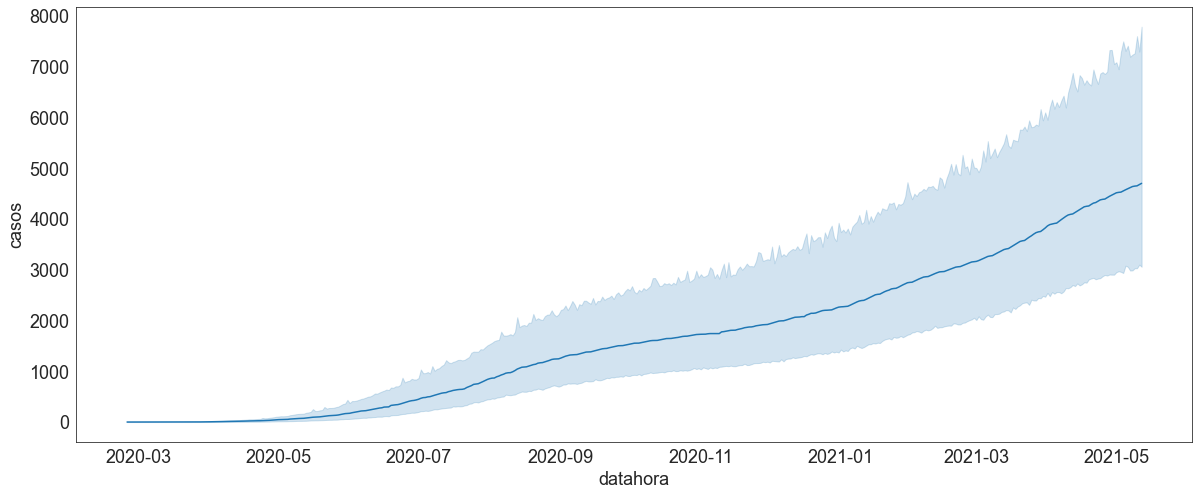

In [475]:
sns.lineplot(x='datahora',y='casos',data=dados)

#### Na imagem acima temos todos os múnicípios indicados nas entradas do DF. A linha principal azul é a média do estado de SP e a faixa representa o número máximo e mínimo de casos em cada momento
#### Abaixo vamos fazer uma variável (DF) somente para o município de São Paulo capital e plotar

In [476]:
dados_sp = dados.query('nome_munic == "São Paulo"')

In [477]:
dados_sp.shape
# deu 443 linhas de entradas nas mesmas 26 colunas

(443, 26)

<AxesSubplot:xlabel='datahora', ylabel='casos'>

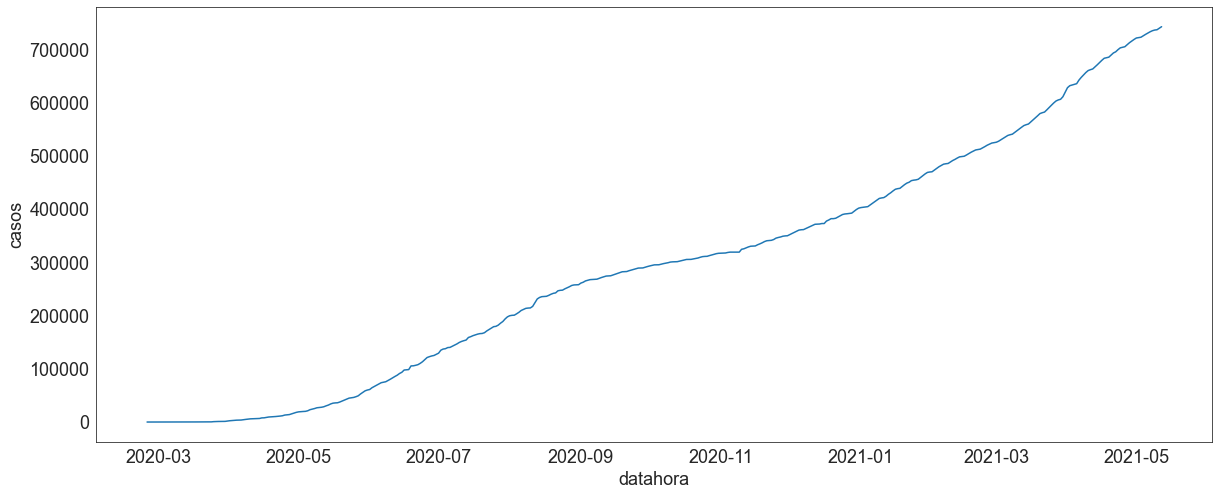

In [478]:
sns.lineplot(x='datahora',y='casos',data=dados_sp)

#### A pergunta que se faz: o crescimento de casos é exponencial ( exponencial é representado por: eˆx )? Caso positivo assumirá uma curva regular.
#### Podemos testar isso entendendo o exemplo abaixo. Fazer um eixo_x regular de -2 a +2 com 100 valores versus o mesmo eixo_x de forma exponencial no eixo Y. O resultado indica curva exponencial. Vide:

In [479]:
import numpy as np

<AxesSubplot:>

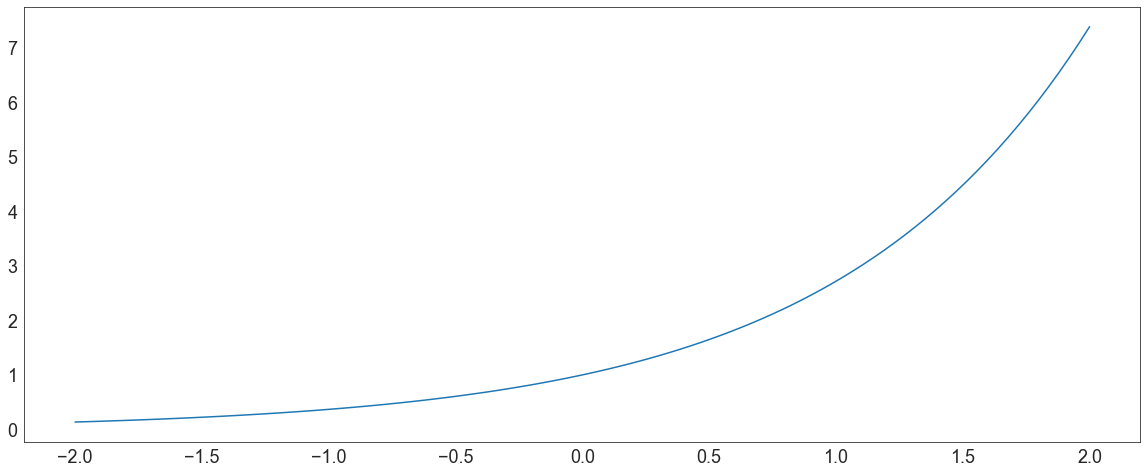

In [480]:
eixo_x = np.linspace(-2, 2, 100)
y_exp = np.exp(eixo_x)
sns.lineplot(x=eixo_x,y=y_exp)

#### Confirmando: se o crescimento é exatamente exponencial perfeito então ao informarmos que o eixo Y assume escala logaritmica o resultado será uma reta exata perfeita. Abaixo o entendimento matemático. 
#### A cada log base 2 (ou base e de número neperiano), com uma 2 ^ x , o resultado é X. Então se cresce exponencial ( e^x,e^x1,..x2,..x3,...) o resultado é uma reta crescente x1-x2-x3-...:
$$ log_2 2  = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

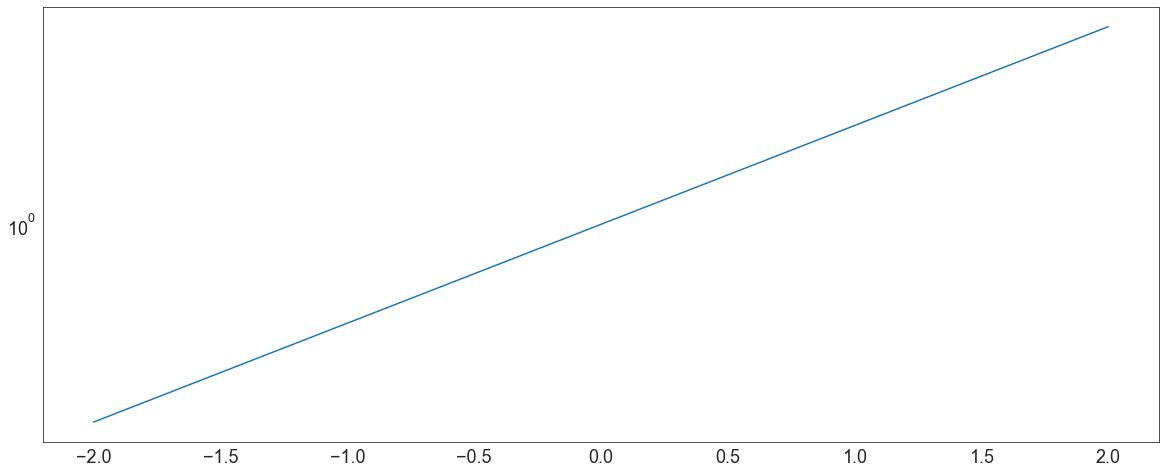

In [481]:
sns.lineplot(x=eixo_x,y=y_exp)
mpl.pyplot.yscale('log')    # indica a escala logarítmica no eixo Y

#### Testando a aparencia da 'reta' com escala logaritmica para os casos de covid apenas do município de São Paulo, indicou escala logaritmica, porém não totalmente regular, aparentando 3 momentos aproximados de crescimento como uma reta:
- 1º até 2020/04
- 2º de 2020-004 a 2020-08
- 3º de 2020-08 ao final

karoline: Nem a curva exponencial é perfeita e nem sempre a aplicação de transformação logarítmica produz uma reta, mas o interessante é percebermos que pequenos seguimentos de retas foram ajustados em determinados períodos, o nos permite formular a hipótese de que houve mudança no padrão de crescimento, além de confirmar que se trata de um exponencial.

Allan: Lembrando que as duas informações na escala linear ou gráfico monolog são válidas, pois são apenas jeitos diferentes de expressar os dados que permitem interpretações diversas.

Karoline: Exato, e a transformação logarítmica também diminui possíveis efeitos de viés de outliers, por isso que provavelmente encontraremos essa curva com monolog no site, pois este recurso acaba suavizando alguns pontos fora da curva ou viés que possa ter aparecido.

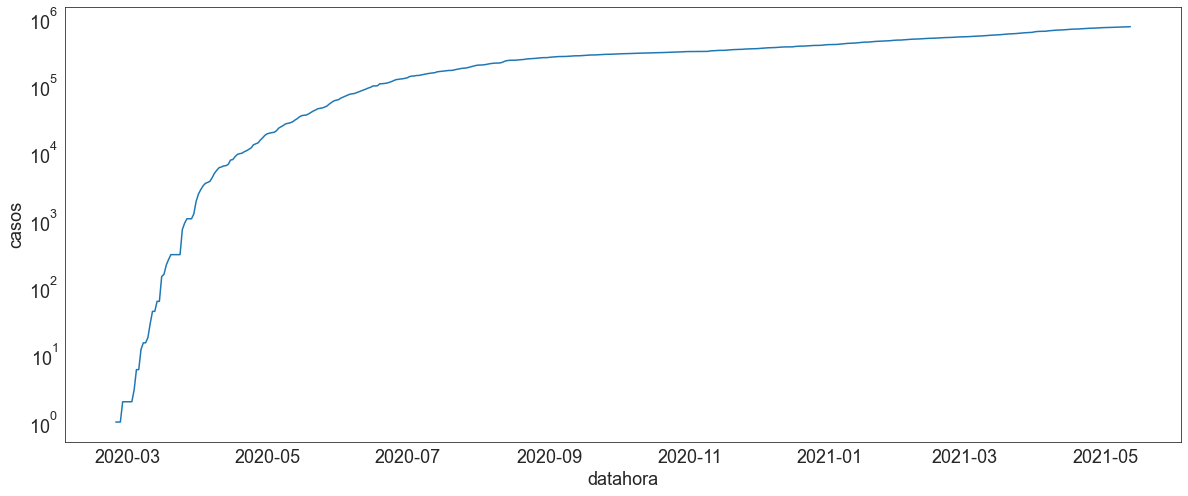

In [482]:
sns.lineplot(x='datahora',y='casos',data=dados_sp)
mpl.pyplot.yscale('log')

#### Agora vamos verificar na série temporal os casos NOVOS para São Paulo:
#### Será que é possível determinar uma TAXA para os casos novos?

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

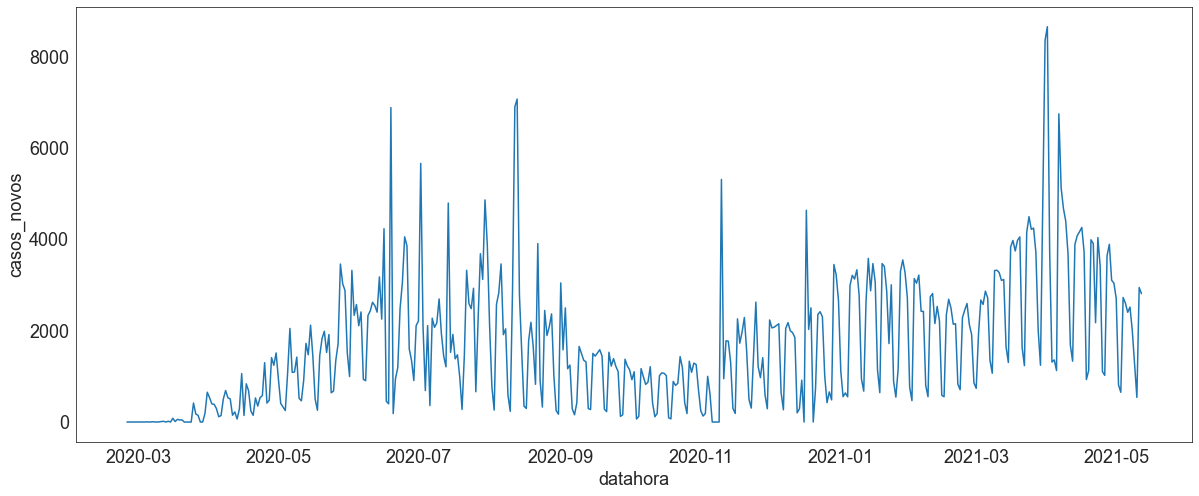

In [483]:
sns.lineplot(x='datahora',y='casos_novos',data=dados_sp)

#### Para avaliar a taxa e crescimento, vamos utilizar uma função chamada DIFERENCIAÇÃO (diff). Em outras palavra, se há uma taxa de crescimento, o diff subtrai de um dado seguinte o valor do dado anterior e plotará o resultado. Abaixo um exmplo prático em um DF criado (10 valores variando entre 1 a 10):

In [484]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10)) 

In [485]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


Criando uma coluna 'diferenciado' usando o diff:

In [486]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

In [487]:
dados_exemplo.head()

,0,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0


#### Plotando um gráfico da coluna '0' do dataframe em ambos eixos (x e y) teremos uma reta crescente (azul) de acordo com os valores crescentes do dataframe de exemplo
#### No mesmo gráfico plotamos também usando o eixo Y da coluna 'diferenciado' que calculou a taxa de crescimento do dataframe usando o diff. Neste caso o valor posterior é sempre 1 a mais que o anterior, portanto o valor é sempre 1, representado uma linha reta valor 1 - horizontal laranja

<AxesSubplot:xlabel='0', ylabel='0'>

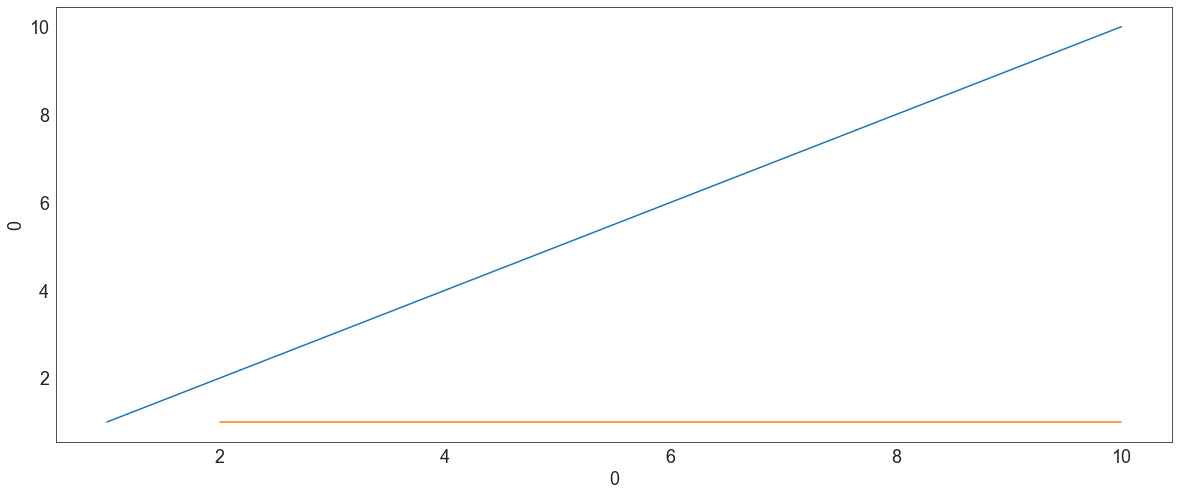

In [488]:
sns.lineplot(x=0,y=0,data=dados_exemplo)
sns.lineplot(x=0,y='diferenciado',data=dados_exemplo)

#### Calculando a taxa de crescimento dos casos e óbitos a partir da avaliação das colunas de casos e óbitos NOVOS:

In [489]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

# Esse warning abaixo não é um erro apenas um aviso de prática de dataframe modificado usando parte do que ele já tem. Não há problemas aqui. Como tirar o warning? vide desafio 1.

In [490]:
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0


#### Vamos ver as taxas de crescimento como linha e como barra para todo o período:
 **observa-se que não há uma linha regular, mas muitos picos e vales indicando que há grandes variações em alguma forma de frequencia**

Text(0.5, 1.0, 'Taxa de crescimento de casos em SP')

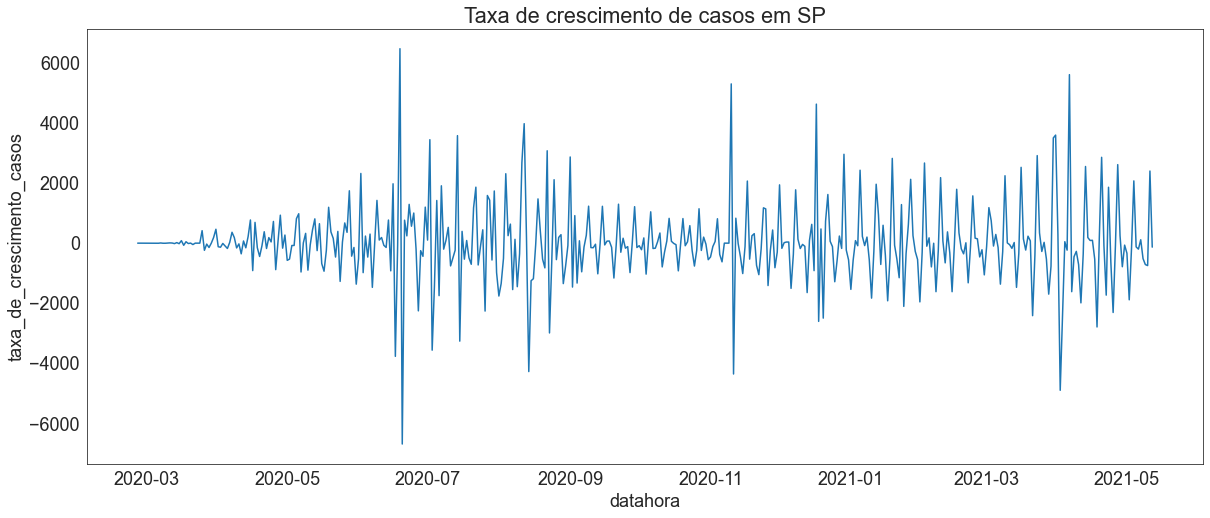

In [491]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_casos',data=dados_sp).set_title('Taxa de crescimento de casos em SP')
#sns.lineplot(x='datahora',y='taxa_de_crescimento_obitos',data=dados_sp)

Text(0.5, 1.0, 'Taxa de crescimento de óbitos em SP')

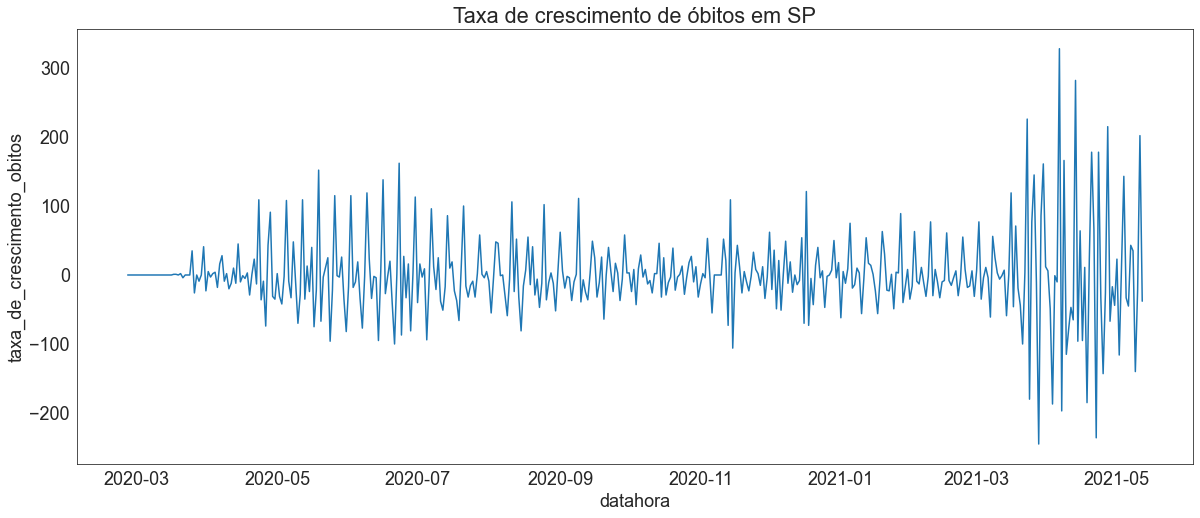

In [492]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_obitos',data=dados_sp).set_title('Taxa de crescimento de óbitos em SP')

In [493]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

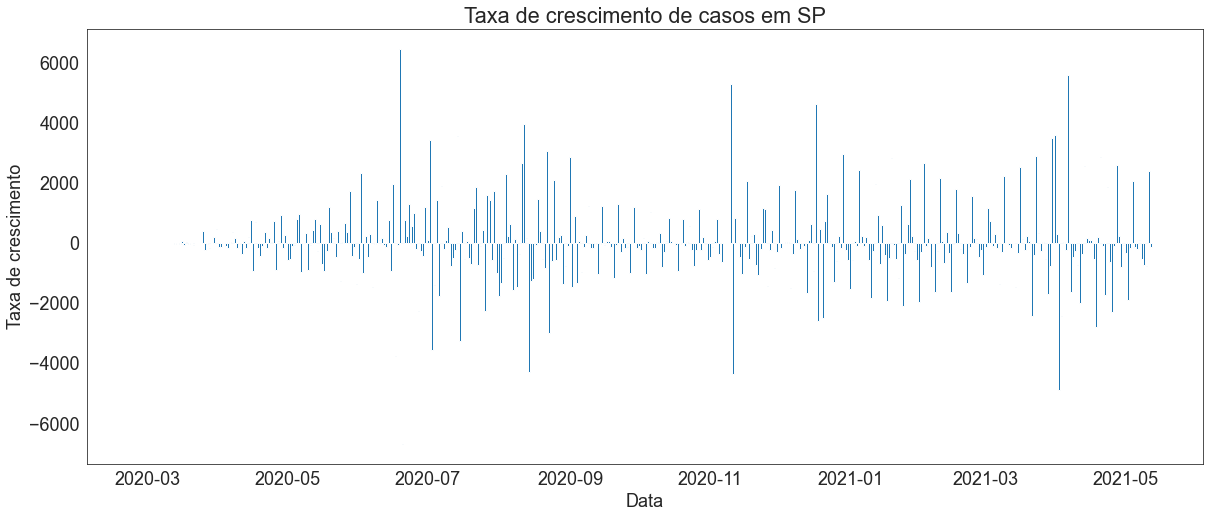

In [494]:
plt.bar(dados_sp['datahora'],dados_sp['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em SP')
plt.ylabel('Taxa de crescimento')
plt.xlabel('Data')

#### Vamos trabalhar a taxa de crescimento como barras e agora delimitar o período criando a coluna ano com datetime e criando uma variável para 2021:

In [495]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year
# Novo warning a ser retirado

In [496]:
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,2020
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,2020
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,2020


In [497]:
dados_2021 = dados_sp.query('ano==2021')

In [498]:
dados_2021.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021


Text(0.5, 0, 'Data')

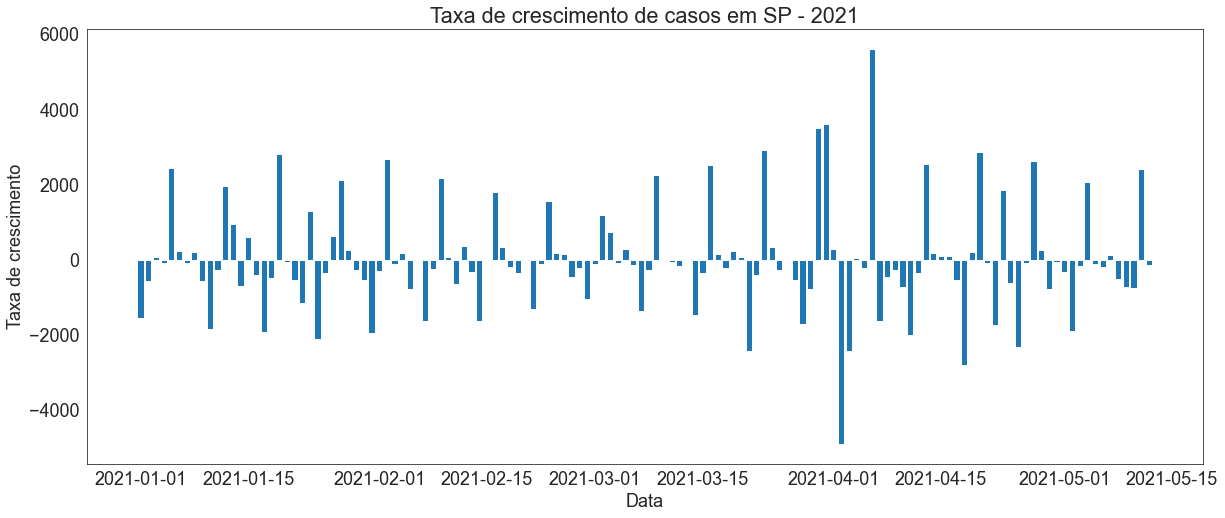

In [499]:
plt.bar(dados_2021['datahora'],dados_2021['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em SP - 2021')
plt.ylabel('Taxa de crescimento')
plt.xlabel('Data')

#### Média móvel: como vimos acima que há variação (semanal) nas subidas e descidas da taxa de crescimento de casos, vamos fazer uma  média móvel e plotar para ver melhor o comportamento dos casos e óbitos novos, todos compartimentados em intervalos de 7 dias (rolling) para compensar as variações dos dias da semana:

In [500]:
dados_sp['media_movel_casos']=dados_sp['casos_novos'].rolling(window=7, center=False).mean()
#   window é a janela de tempo usada para fazer a média móvel - center é a posição onde ficará cada ponto calculado da média móvel (se true será plotado no centro do período (4º dia) se False será plotado no último dia)
dados_sp['media_movel_obitos']=dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

In [501]:
dados_sp.tail()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0,2021,1956.571429,114.571429
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0,2021,2024.142857,116.714286
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0,2021,2008.142857,114.142857
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0,2021,2039.142857,120.000000
285652,São Paulo,3550308,12,5,2021-05-12,742629,2808,"6,256531e+03","2069,0000000",28764,...,>5000,1.0,"-23,5329","-46,6395",19,-133.0,-38.0,2021,2069.000000,125.142857


<AxesSubplot:title={'center':'Novos casos e média móvel - SP'}, xlabel='datahora', ylabel='casos_novos'>

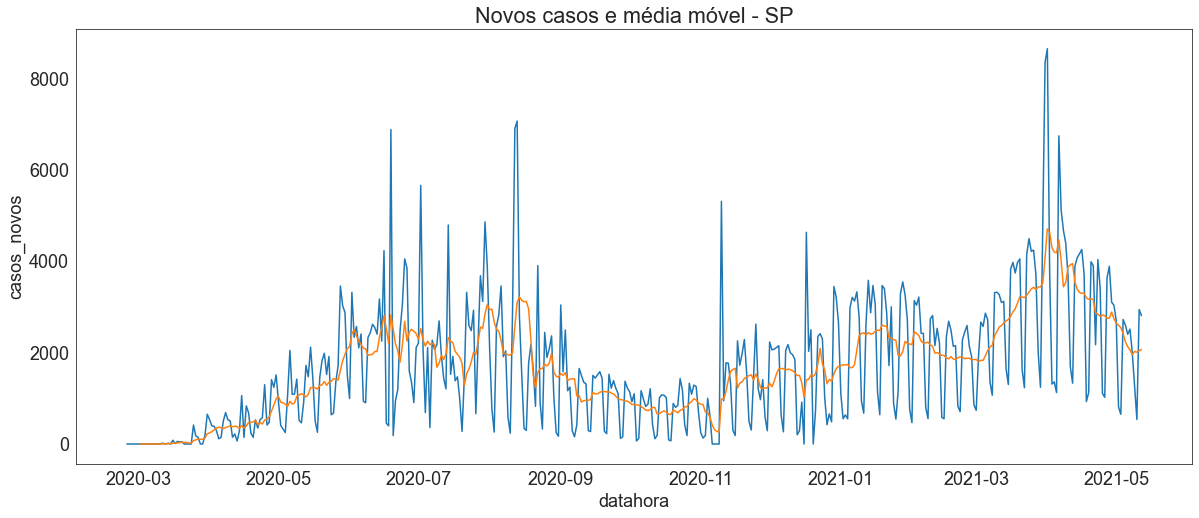

In [502]:
sns.lineplot(x='datahora',y='casos_novos',data=dados_sp).set_title('Novos casos e média móvel - SP')
sns.lineplot(x='datahora',y='media_movel_casos',data=dados_sp)

<AxesSubplot:title={'center':'Novos óbitos e média móvel - SP'}, xlabel='datahora', ylabel='obitos_novos'>

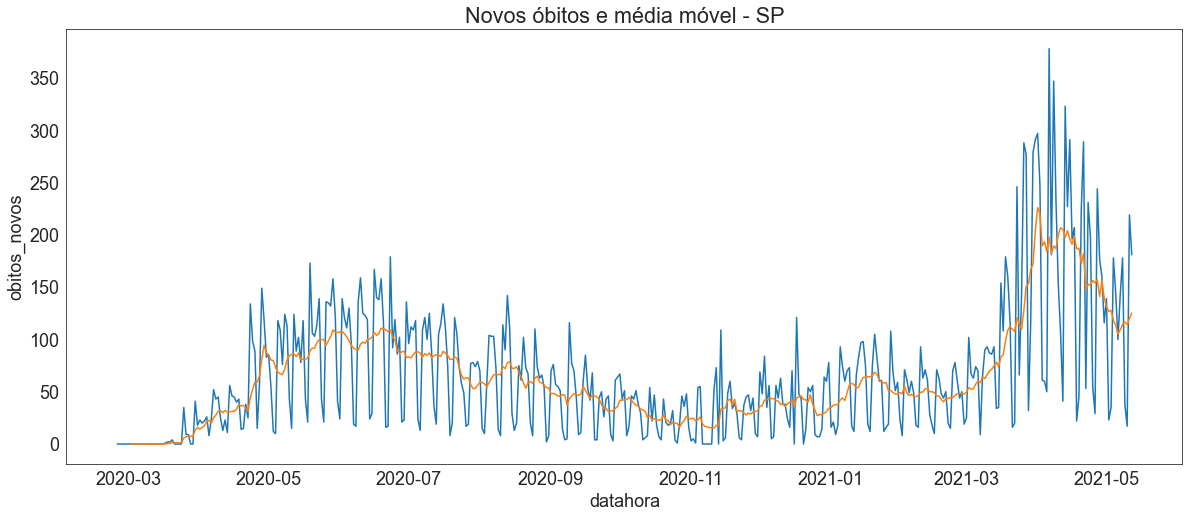

In [503]:
sns.lineplot(x='datahora',y='obitos_novos',data=dados_sp).set_title('Novos óbitos e média móvel - SP')
sns.lineplot(x='datahora',y='media_movel_obitos',data=dados_sp)

#### Podemos obter também a taxa de crescimento de cada média móvel e observar que apesar de menor variação com a taxa de crescimento de novos casos e óbitos, ainda há forte variação temporal (em escalas Y diferentes para taxas da média de casos ne óbitos novos):

In [504]:
dados_sp['taxa_de_crescimento_media_movel_casos'] = dados_sp['media_movel_casos'].diff()
dados_sp['taxa_de_crescimento_media_movel_obitos'] = dados_sp['media_movel_obitos'].diff()

Text(0.5, 1.0, 'Taxa de crescimento da média móvel de casos em SP')

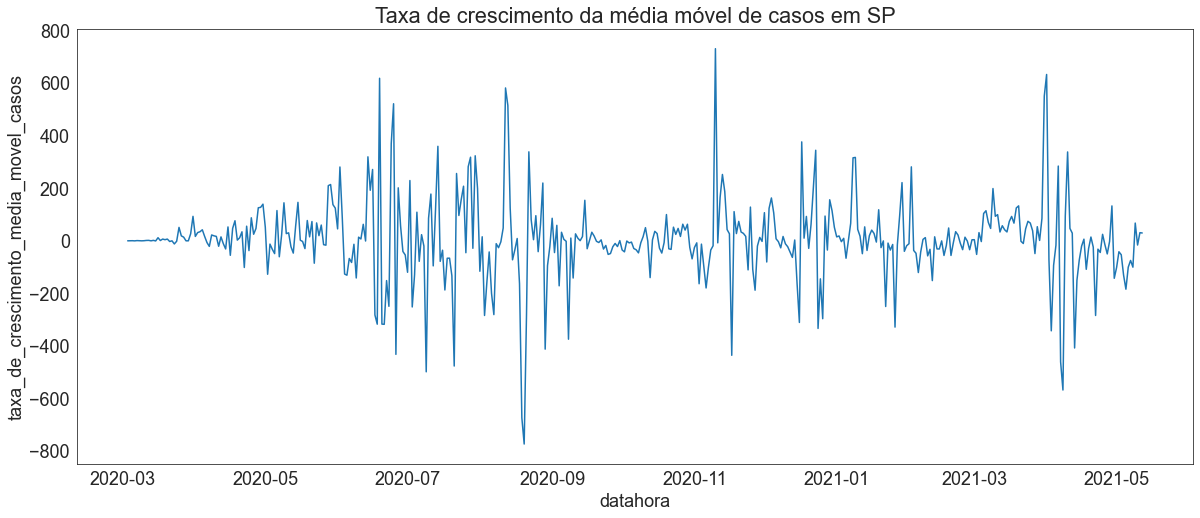

In [505]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_media_movel_casos',data=dados_sp).set_title('Taxa de crescimento da média móvel de casos em SP')

Text(0.5, 1.0, 'Taxa de crescimento da média móvel de óbitos em SP')

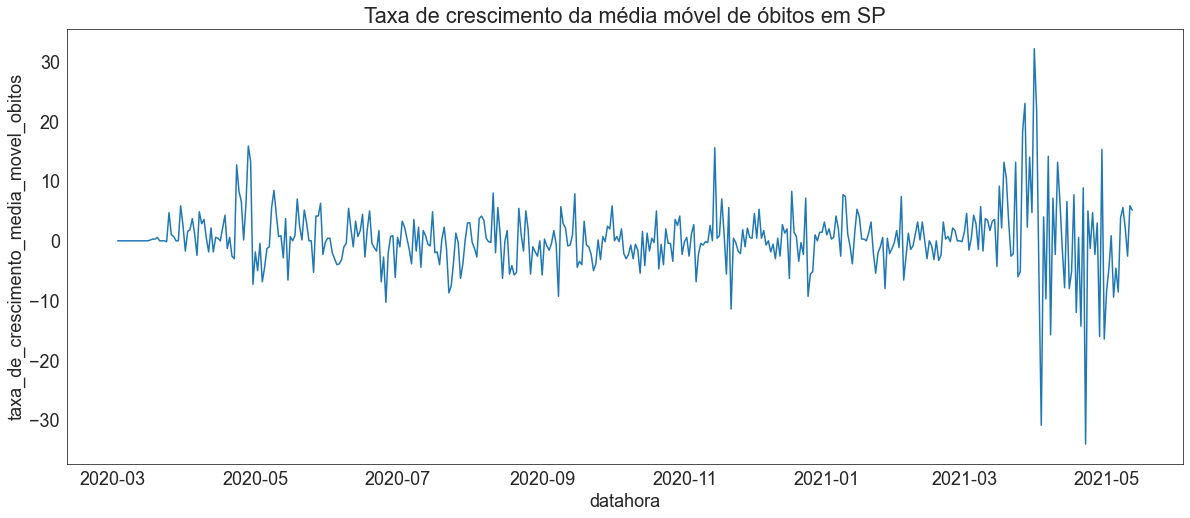

In [506]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_media_movel_obitos',data=dados_sp).set_title('Taxa de crescimento da média móvel de óbitos em SP')

#### Correlação: vamos agora começar a explorar a possibilidade de casos novos se relacionar com óbitos novos.
#### Para isso vamos no conceito de que se um cresce o outro cresce (correlação direta) ou decresce (correlação inversa ou indireta). Acorrelação varia de -1 a 1 - zero ou próximo a isso dizemos que a correlação é nula ou sem correlação
#### Exemplificando, para verificar possibilidade de correlação, colocamos um gráfico abaixo apenas de 'casos_novos'. Por óbvio se fosse uma correlação, seria direta e perfeita, indicando uma linha reta crescente (ver pacotes estatísticos como o StatsModel para usar correlação verdadeiramente)

<AxesSubplot:xlabel='casos_novos', ylabel='casos_novos'>

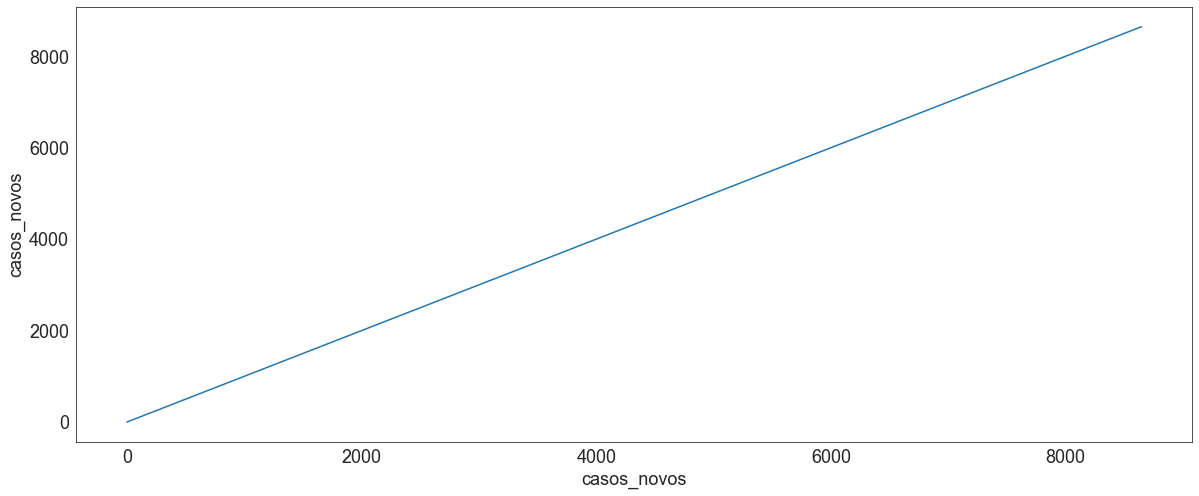

In [507]:
sns.lineplot(x='casos_novos',y='casos_novos',data=dados_sp)

#### Se aplicarmos a Verificação da possibilidade de correlação entre 'casos_novos' e 'obitos_novos' não teríamos uma reta... mas será que o tempo entre o surgimento de 'casos_novos' e o de 'obitos_novos' é o mesmo em cada ciclo ou fase? Por toda informação divulgada  entendemos que não, que podem ter um delay de cerca de 15 dias. Em desafios testaremos esse atraso

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

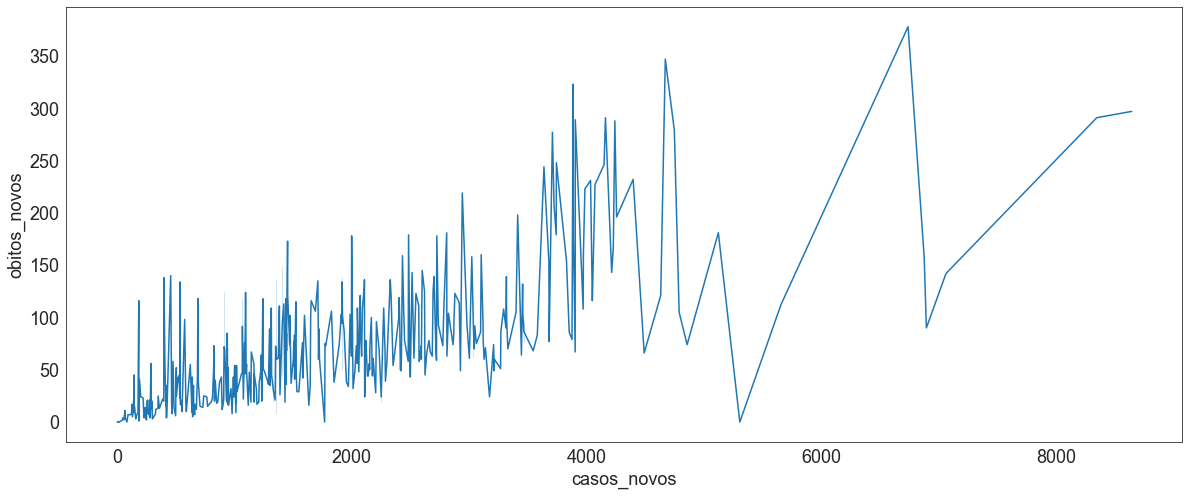

In [508]:
sns.lineplot(x='casos_novos',y='obitos_novos',data=dados_sp)

#### Vamos agora investigar se há alguma SAZONALIDADE nos dados, verificando melhor a variação (altos e baixos dos dados) dentro dos 'casos_novos', em uma data menor, de 1 mês que permita avaliar os dias, ou seja se há algum padrão repetitivo na variação:

In [509]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dado_202102 = dados_sp.query('mes==2 & ano==2021')

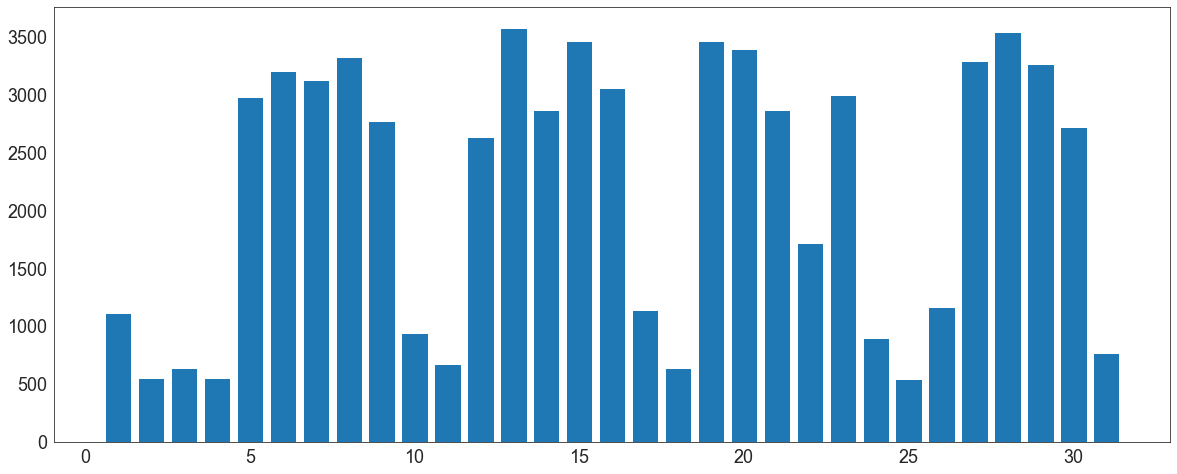

<BarContainer object of 28 artists>

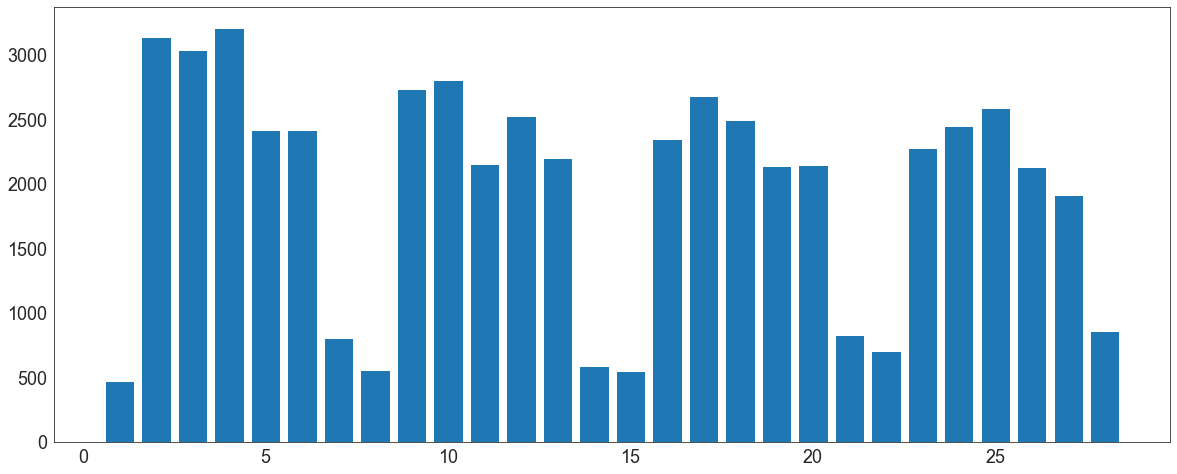

In [510]:
plt.bar(np.linspace(1,31,31),dados_202101['casos_novos'])   # Eixo x tem 31 ticks pelo linspace para representar os dias de janeiro
plt.show()
plt.bar(np.linspace(1,28,28),dado_202102['casos_novos'])    # Eixo x tem 28 ticks pelo linspace para representar os dias de fevereiro

Nessa base de dados de covid podemos ver facilmente que há variação que indica sazonalidade - onde há cinco dias mais altos de novos casos e sempre 2 dias (domingo e segunda) de casos mais baixos, mostrando que ao menos na notificação de saúde os números são menores após 1 dia após o fim de semana de menor equipe de trabalho na estruturas de saúde. em São Paulo, inclusive o dia 25/jan é feriado e no dia seguinte a terça 26 a notificação obedeceu esse critério e foi, nesse mês específico, mais baixa.

#### Função de autocorrelação: nem todas as séries temporais são fáceis de descobrir sazonalidade, por isso existe a função de AUTOCORRELAÇÃO para que possa ocorrer essa verificação em forma de gráfico:

In [511]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

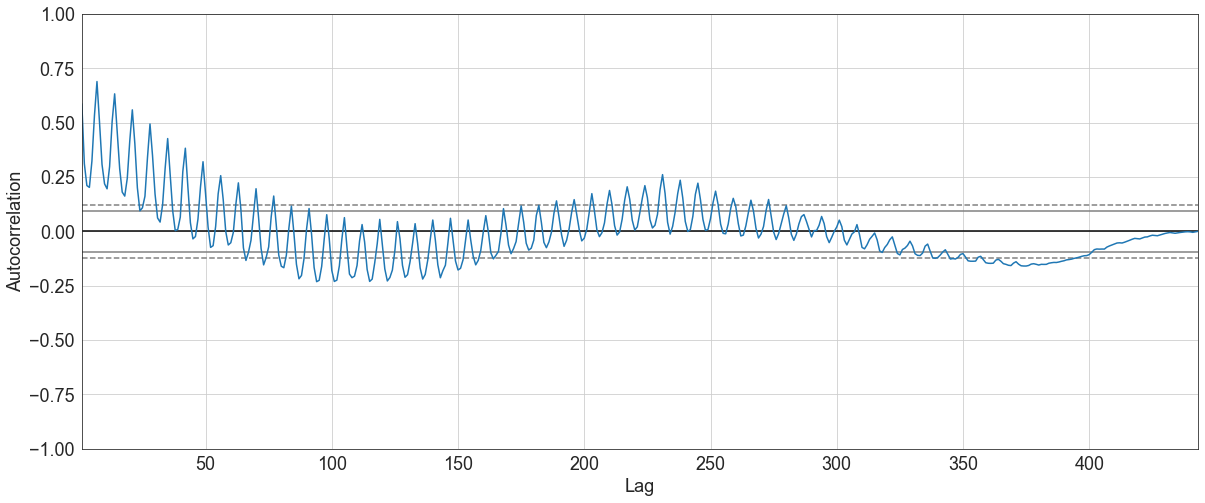

In [512]:
autocorrelation_plot(dados_sp['casos_novos'])

- Esse gráfico novo não está em tempo e sim em LAGs - Esse gráfico faz a correlação da série temporal de casos novos com uma cópia dela mesma. Assim, a função multiplica uma valor de uma série pelo respectivo da outra e soma, depois multiplica novamente com um LAG de posição (pulando o valor para o seguinte) e assim por diante, de modo que gera um conjunto de pontos.
- Se fosse uma correlação perfeita o resultado seria bem alto ou bem baixo no gráfico, ficando distante do zero.
- Para nosso caso, fica visível que HÁ alguma Correlação Temporal de casos novos com os dias de notificação (indicando uma sazonalidade), pois o gráfico começa com valor mais alto de Autocorrelation.
- Com o passar do tempo (aumento de LAGs), todavia, a autocorrelação tende a ir para o zero a medida que a série temporal avança e a pandemia se diferencia em seus momentos.

#### Para comprovar graficamente que obtivemos alguma correlação acima, podemos testar com dados aleatórios, que exatamente por serem randomicos não teriam nenhuma autocorrelação, assim podemos demonstrar:

In [513]:
dados_sp.shape    # verificando o formato (shape) do DataFrame para repetir em um outro randomico

(443, 33)

In [514]:
aleatorio = np.random.rand(435)    # DF randomico 'aleatorio' com mesmo shape = com 443 linhas - que dados_sp

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

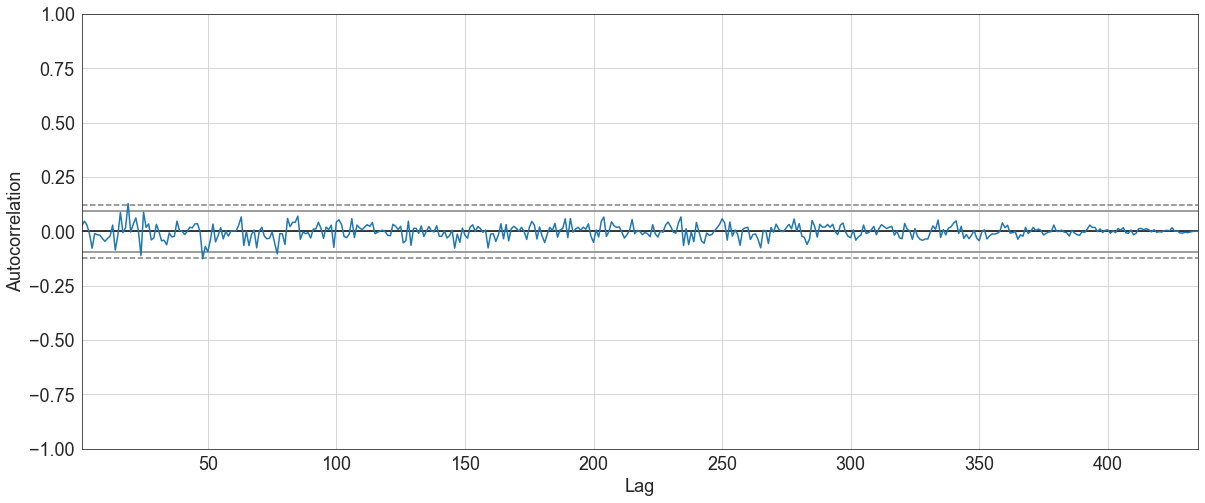

In [515]:
autocorrelation_plot(aleatorio)

- Esse gráfico de autocorrelação acima, apresenta todos os valores muito baixos, todos dentro da faixa pontilhada próximos a zero, demonstrando que não há autocorrelação, apenas eventuais flutuações pequenas de correlações espúrias
- Assim, mostra-se que não há autocorrelação da base randomica sem dependencia estatística temporal.
#### Vamos destacar que há uma correlação cruzada entre duas variáveis diferentes. Assim, podemos pensar em testar correlaçao cruzada usando a Biblioteca StatsModel entre casos e óbitos (Desafio).

### Desafios Aula 1 - Módulo 3
***
***

### Desafios parte 1/2

#### Desafios 01 - Filtrar a base de dados com alguma outra função
- Desenvolvido por [**@HCK1ller**](https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/modulo-03/Bootcamp_DS_modulo3_aula1.ipynb)  aluno BootCamp DataScience 2 Alura

Formas de Filtrar:

- indexação booleana

In [516]:
df_filtro = dados['nome_munic'] == 'Taubaté'   # índice booleano no caso igual(==)
dados_Registro = dados[df_filtro]
dados_Registro.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
604,Taubaté,3554102,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
1249,Taubaté,3554102,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
1894,Taubaté,3554102,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
2539,Taubaté,3554102,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
3184,Taubaté,3554102,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9


- indexação posicional

In [517]:
posicoes = np.flatnonzero(df_filtro)
dados_Registro2 = dados.iloc[posicoes]
dados_Registro2.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
604,Taubaté,3554102,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
1249,Taubaté,3554102,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
1894,Taubaté,3554102,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
2539,Taubaté,3554102,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9
3184,Taubaté,3554102,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,...,Taubaté,17,307361,47104,625,0,8.0,"-23,0104","-45,5593",9


- Encadeamento de Pandas utiliizando .eq()


In [518]:
dados_campinas = dados[dados.nome_munic.eq('Serrana')]
dados_campinas.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
574,Serrana,3551504,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
1219,Serrana,3551504,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
1864,Serrana,3551504,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
2509,Serrana,3551504,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
3154,Serrana,3551504,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9


- Utilizando a função isin()

In [519]:
filtro_municipios = ['Suzano','Mogi das Cruzes','Guarulhos']
outros_municipios = dados[dados.nome_munic.isin(filtro_municipios)]
outros_municipios.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
212,Guarulhos,3518800,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Grande São Paulo,10,1351275,162662,31868,0,8.0,"-23,4538","-46,5333",9
343,Mogi das Cruzes,3530607,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Grande São Paulo,10,432905,60748,71254,0,8.0,"-23,5208","-46,1854",9
584,Suzano,3552502,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Grande São Paulo,10,291002,37156,20624,0,8.0,"-23,5448","-46,3112",9
857,Guarulhos,3518800,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Grande São Paulo,10,1351275,162662,31868,0,8.0,"-23,4538","-46,5333",9
988,Mogi das Cruzes,3530607,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Grande São Paulo,10,432905,60748,71254,0,8.0,"-23,5208","-46,1854",9


- Negação de filtro com ( ~ )

In [520]:
demais_municipios = dados[ ~ dados.nome_munic.isin(filtro_municipios)]    # todos os municípios EXCETO os do filtro_municípios acima
demais_municipios.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


#### Desafio 02 - Escolher outro município para fazer a análise (casos + verificação exponencial usando a escala Logarítmica + Casos novos + Taxa de crescimento casos novos

In [521]:
data_serrana=dados.query("nome_munic == 'Serrana'")   # nosgráficos pode usar tanto o query quanto a variável data_serrana
data_serrana.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
574,Serrana,3551504,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
1219,Serrana,3551504,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
1864,Serrana,3551504,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
2509,Serrana,3551504,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9
3154,Serrana,3551504,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,...,Ribeirão Preto,1,44434,4998,12605,0,8.0,"-21,2043","-47,5952",9


- Número de casos acumulados em SERRANA-SP

<AxesSubplot:xlabel='datahora', ylabel='casos'>

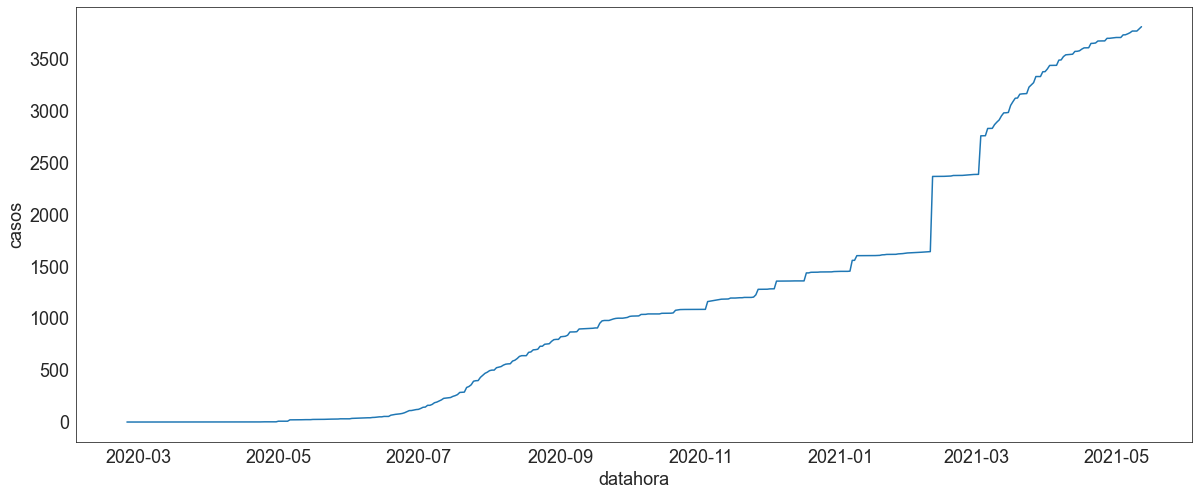

In [522]:
sns.lineplot(x='datahora', y='casos', data=dados.query("nome_munic == 'Serrana'"))

- Análise do gráfico de casos em **Serrana-SP** em escala logaritmica para verificar a psossibilidade do crescimento exponencial

- Parecido com São Paulo capital, parece haver crescimento exponencial e também há ao menos 3 momentos diferentes

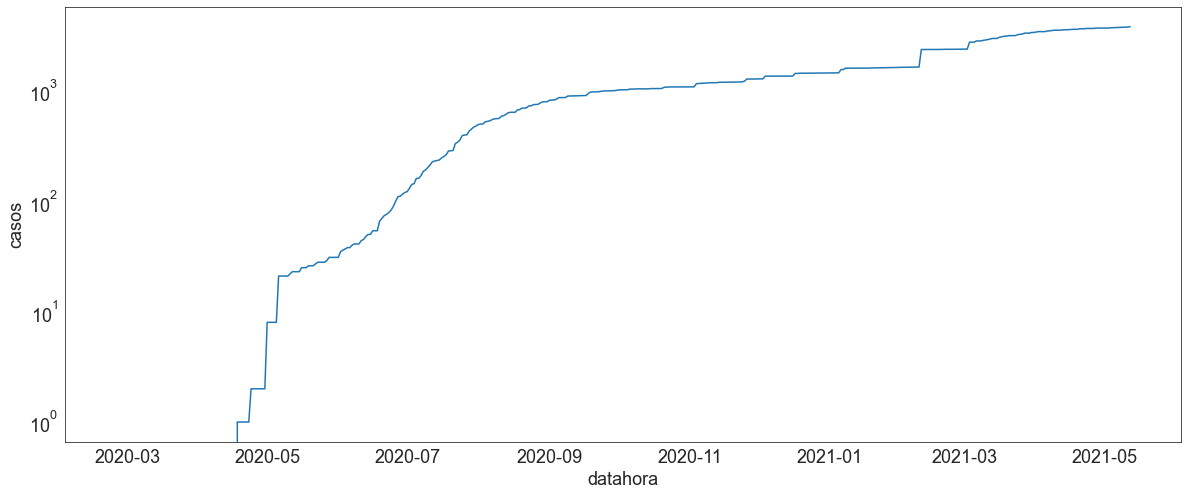

In [523]:
sns.lineplot(x='datahora', y='casos', data=data_serrana)
mpl.pyplot.yscale('log')

- Casos Novos em Serrana-SP

Text(0.5, 1.0, 'Casos novos de Covid em Serrana-SP')

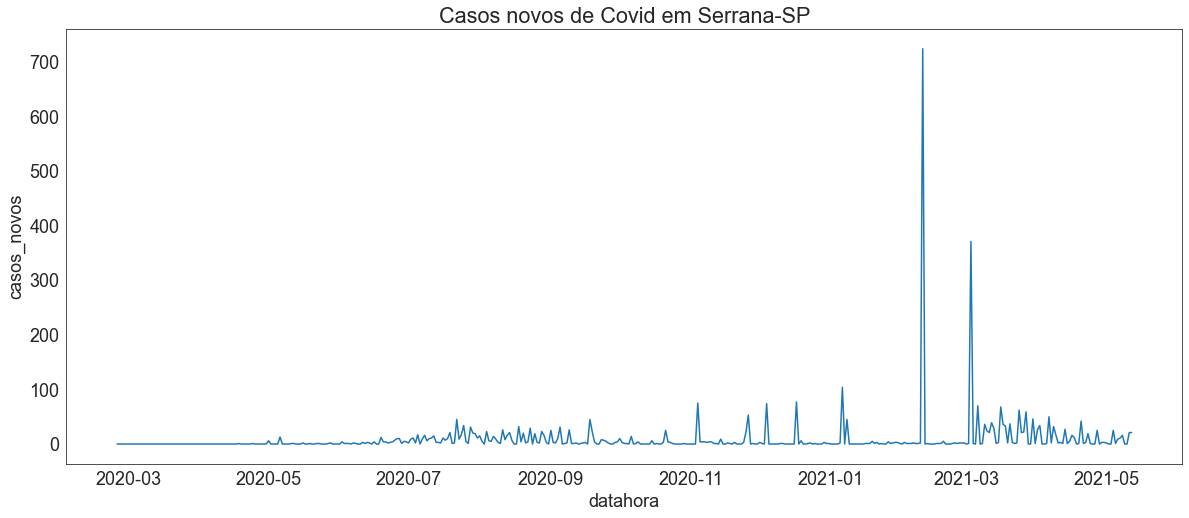

In [524]:
sns.lineplot(x='datahora',y='casos_novos',data=dados.query("nome_munic == 'Serrana'")).set_title('Casos novos de Covid em Serrana-SP')

- Taxa de crescimento de casos em Serrana-SP: há dois picos muito altos a investigar

Text(0.5, 1.0, 'Taxa de crescimento de casos em SP')

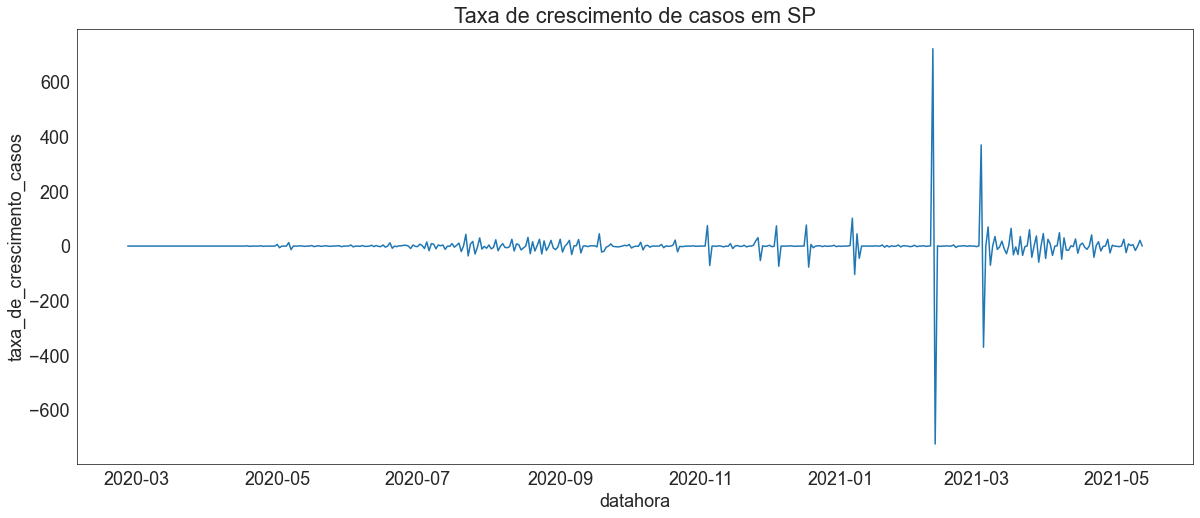

In [525]:
data_serrana['taxa_de_crescimento_casos'] = data_serrana['casos_novos'].diff()
sns.lineplot(x='datahora',y='taxa_de_crescimento_casos',data=data_serrana).set_title('Taxa de crescimento de casos em SP')

### Desafios parte 2/2

#### Desafio 01 - Aula 1: Um notebook sem warnings

Vamos testar a retirada de wiarnings como os que apareceram quando estávamos fazendo slices no DF. No nosso caso não há problemas. Assim, vamos usar uma função sobre warnings e testar em um código que surgiu esse aviso:

In [526]:
import warnings
warnings.filterwarnings('ignore')

In [527]:
dados_sp['taxa_de_crescimento_media_movel_obitos'] = dados_sp['media_movel_obitos'].diff()

Vide acima, que esse mesmo código executando antes dava um warning. Agora usamos o filtro para ignorar esses warnings e manter o código mais limpo.

#### Desafio 02 - Aula 1: Pico taxa de casos novos coincide com taxa dos óbitos novos.

Vamos plotar em gráfico de barra as duas variáveis acima, porém em um intervalo de 1 mês apenas, para melhor visualizar.<br>
Vamos aproveitar os DFs já feitos de 'dados_202101' de janeiro e 'dados_202102' de fevereiro de 2021 e ver dois gráficos, desses meses:

In [528]:
dados_202101.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos,taxa_de_crescimento_media_movel_casos,taxa_de_crescimento_media_movel_obitos
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,...,"-23,5329","-46,6395",53,-1540.0,-62.0,2021,1714.428571,35.142857,15.000000,1.000000
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,...,"-23,5329","-46,6395",53,-564.0,5.0,2021,1733.000000,37.142857,18.571429,2.000000
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,...,"-23,5329","-46,6395",1,84.0,-12.0,2021,1729.714286,37.428571,-3.285714,0.285714
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,...,"-23,5329","-46,6395",1,-86.0,9.0,2021,1739.285714,38.000000,9.571429,0.571429
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,...,"-23,5329","-46,6395",1,2430.0,75.0,2021,1673.000000,42.142857,-66.285714,4.142857


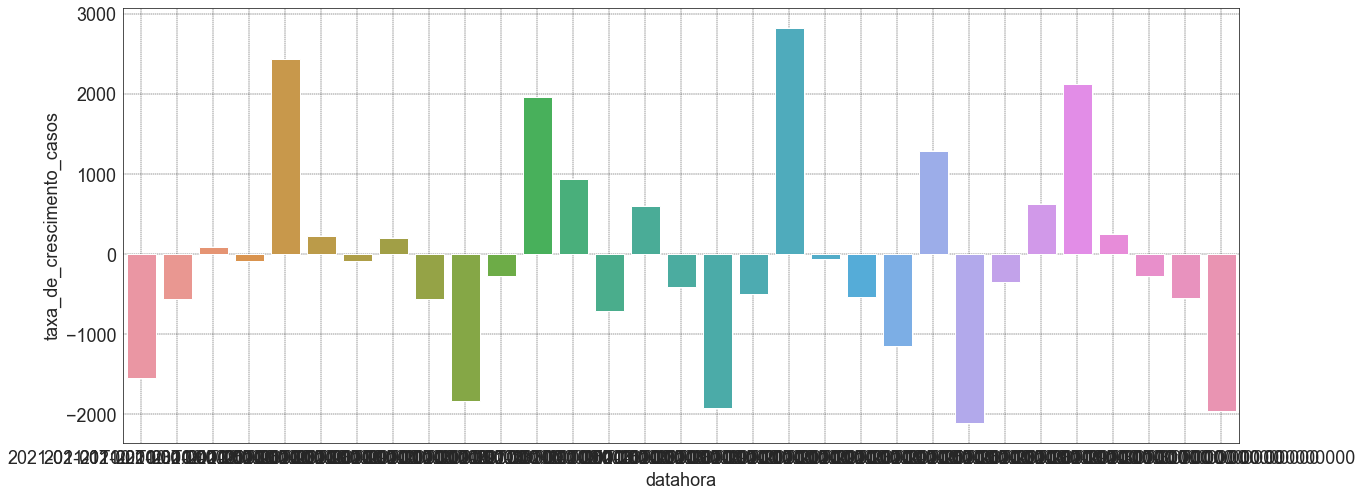

In [529]:
sns.barplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_202101)
#plt.xlim(18628, 18642)    #limitando para 15 dias o eixo x 
plt.grid(linestyle="--", linewidth=0.4, color='black')

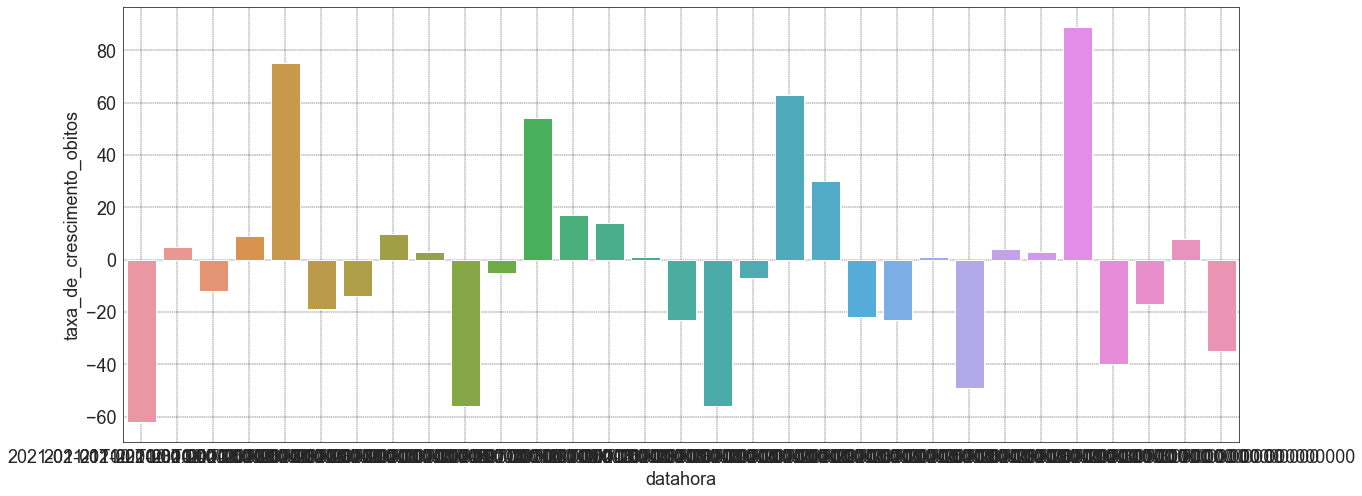

In [530]:
sns.barplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_202101)
#plt.xlim(18628, 18642)
plt.grid(linestyle="--", linewidth=0.4, color='black')

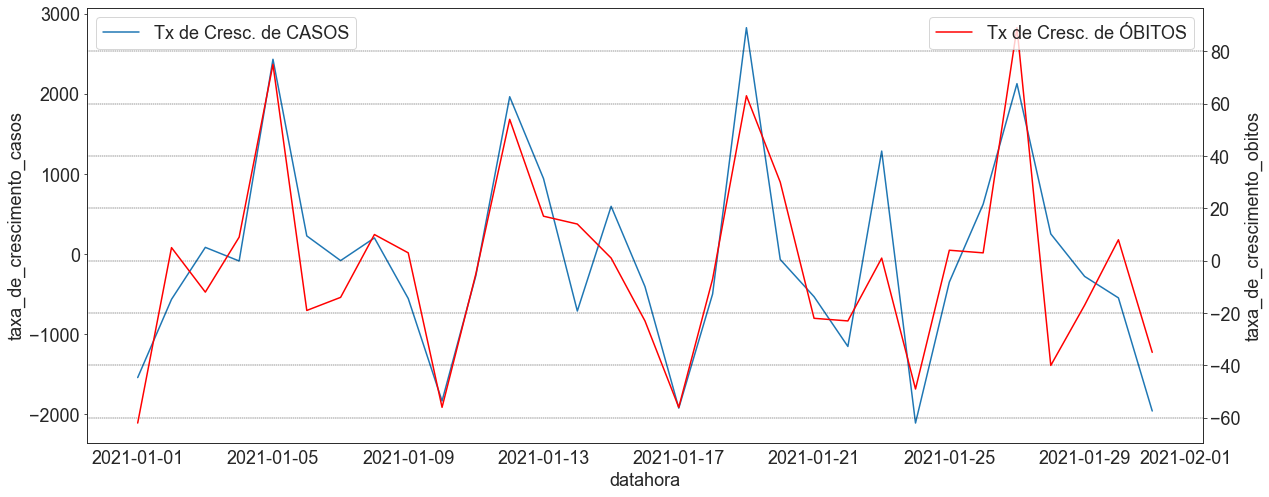

In [531]:
g1 = sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_202101)
plt.legend(['Tx de Cresc. de CASOS'], loc='upper left')
ax2 = plt.twinx()
g2 = sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_202101, color='r', ax=ax2)
plt.legend(['Tx de Cresc. de ÓBITOS'], loc='upper right')
plt.grid(linestyle="--", linewidth=0.4, color='black')
plt.locator_params(axis='y', nbins=13)

plt.show()

**Sim, os picos das taxas de crescimento de casos novos e óbitos novso coincidem na maioria dos casos, indicando que são reportados a partir da mesma série. Resta saber se o começo e o fim de determinados momentos são coincidentes ou se tem algum delay entre a subida de casos e a de óbitos novos**

#### Desafio 03 - Aula 1: Fazer melhorias nos gráficos.

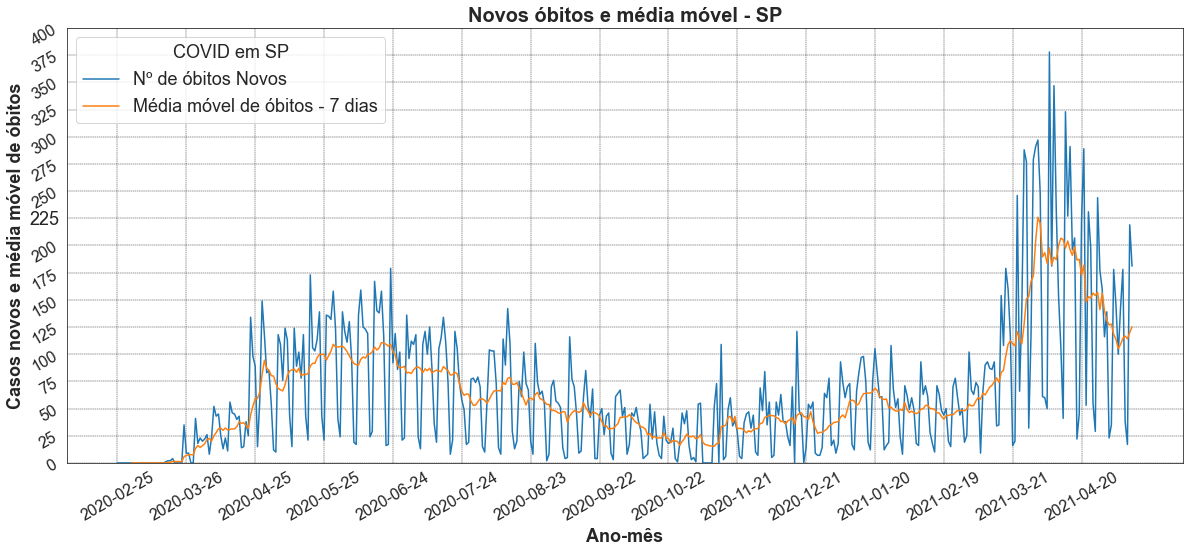

In [569]:
import matplotlib.ticker as ticker
plt.figure(figsize=(20,8))

ax = sns.lineplot(x='datahora',y='obitos_novos',data=dados_sp).set_title('Novos óbitos e média móvel - SP', fontsize=20, weight=(700))
ax2 = sns.lineplot(x='datahora',y='media_movel_obitos',data=dados_sp)
ax2.xaxis.set_major_locator(ticker.IndexLocator(base=30, offset=0))

plt.legend(title='COVID em SP', labels=('Nº de óbitos Novos','Média móvel de óbitos - 7 dias'))
plt.ylabel('Casos novos e média móvel de óbitos', fontsize=18, weight=(700)) 
plt.xlabel('Ano-mês', fontsize=18, weight=(700))
plt.ylim(0,400)

plt.xticks(rotation=30, fontsize=16)
plt.yticks(fontsize=16, rotation=30)
plt.locator_params(axis='y', nbins=17)
plt.grid(linestyle="--", linewidth=0.4, color='black')
plt.show()

#### Desafio 04 - Aula 1: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

In [533]:
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos,taxa_de_crescimento_media_movel_casos,taxa_de_crescimento_media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,"-23,5329","-46,6395",9,NaN,NaN,2020,NaN,NaN,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,"-23,5329","-46,6395",9,1.0,0.0,2020,NaN,NaN,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,"-23,5329","-46,6395",9,-1.0,0.0,2020,NaN,NaN,NaN,NaN


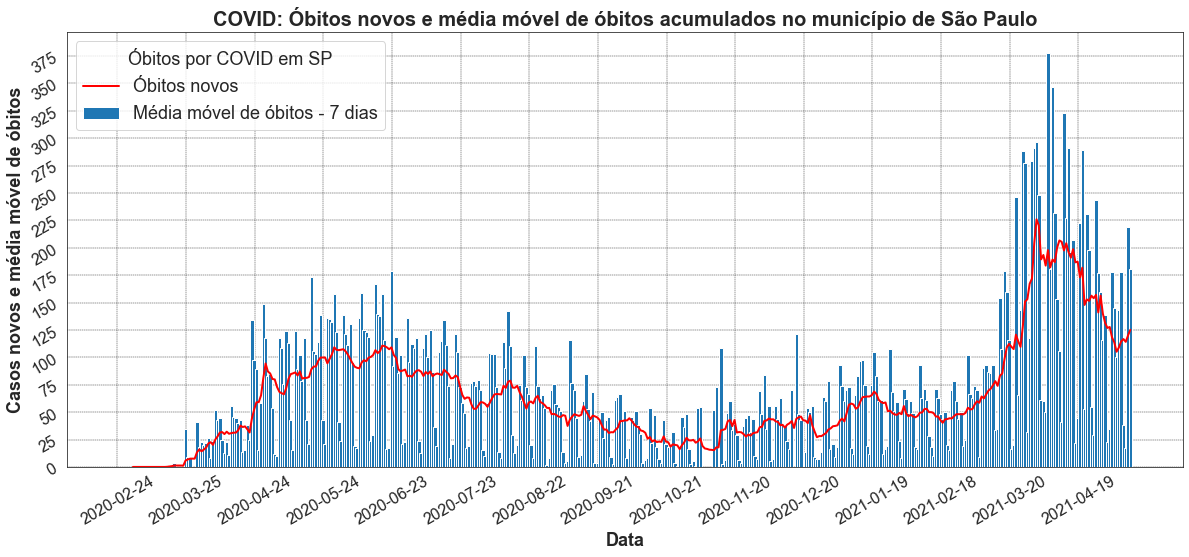

In [585]:
import matplotlib.ticker as ticker
plt.figure(figsize=(20,8))

plt.bar(dados_sp['datahora'], dados_sp['obitos_novos'], width=1.5)
ax = sns.lineplot(x='datahora',y='media_movel_obitos',data=dados_sp, color='r', linewidth=2)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30, offset=0))

plt.title('COVID: Óbitos novos e média móvel de óbitos acumulados no município de São Paulo', fontsize=20, weight=(700))
plt.legend(title='Óbitos por COVID em SP', labels=('Óbitos novos','Média móvel de óbitos - 7 dias'))
plt.ylabel('Casos novos e média móvel de óbitos', fontsize=18, weight=(700)) 
plt.xlabel('Data', fontsize=18, weight=(700))
plt.xticks(rotation=30, fontsize=16)
plt.yticks(fontsize=16, rotation=30)
plt.locator_params(axis='y', nbins=17)
plt.grid(linestyle="--", linewidth=0.4, color='black')
plt.show()

#### Desafio 05 - Aula 1: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

A função shift do pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) move o período para frente ou para trás. Vamos fazer vários períodos com avanço ou atraso de 7 dias de óbitos novos e plotar com casos novos paea verificar se obtemos algum reta de correlação

In [659]:
dados_sp['obitos_-42_dias']= dados_sp['obitos_novos'].shift(-42)
dados_sp['obitos_-35_dias']= dados_sp['obitos_novos'].shift(-35)
dados_sp['obitos_-28_dias']= dados_sp['obitos_novos'].shift(-28)
dados_sp['obitos_-21_dias']= dados_sp['obitos_novos'].shift(-21)
dados_sp['obitos_-14_dias'] = dados_sp['obitos_novos'].shift(-14)
dados_sp['obitos_-8_dias'] = dados_sp['obitos_novos'].shift(-8)
dados_sp['obitos_-7_dias'] = dados_sp['obitos_novos'].shift(-7)
dados_sp['obitos_-6_dias'] = dados_sp['obitos_novos'].shift(-6)
dados_sp['obitos_-5_dias'] = dados_sp['obitos_novos'].shift(-5)
dados_sp['obitos_-4_dias'] = dados_sp['obitos_novos'].shift(-4)
dados_sp['obitos_-3_dias'] = dados_sp['obitos_novos'].shift(-3)
dados_sp['obitos_-2_dias'] = dados_sp['obitos_novos'].shift(-2)
dados_sp['obitos_-1_dias'] = dados_sp['obitos_novos'].shift(-1)
dados_sp['obitos_1_dias'] = dados_sp['obitos_novos'].shift(1)
dados_sp['obitos_2_dias'] = dados_sp['obitos_novos'].shift(2)
dados_sp['obitos_3_dias'] = dados_sp['obitos_novos'].shift(3)
dados_sp['obitos_7_dias'] = dados_sp['obitos_novos'].shift(7)
dados_sp['obitos_14_dias']= dados_sp['obitos_novos'].shift(14)
dados_sp['obitos_21_dias']= dados_sp['obitos_novos'].shift(21)
dados_sp['obitos_28_dias']= dados_sp['obitos_novos'].shift(28)
dados_sp['obitos_35_dias']= dados_sp['obitos_novos'].shift(35)
dados_sp['obitos_42_dias']= dados_sp['obitos_novos'].shift(42)

In [660]:
dados_sp.columns

Index(['nome_munic', 'codigo_ibge', 'dia', 'mes', 'datahora', 'casos',
       'casos_novos', 'casos_pc', 'casos_mm7d', 'obitos', 'obitos_novos',
       'obitos_pc', 'obitos_mm7d', 'letalidade', 'nome_ra', 'cod_ra',
       'nome_drs', 'cod_drs', 'pop', 'pop_60', 'area', 'map_leg', 'map_leg_s',
       'latitude', 'longitude', 'semana_epidem', 'taxa_de_crescimento_casos',
       'taxa_de_crescimento_obitos', 'ano', 'media_movel_casos',
       'media_movel_obitos', 'taxa_de_crescimento_media_movel_casos',
       'taxa_de_crescimento_media_movel_obitos', 'obitos_-7_dias',
       'obitos_-14_dias', 'obitos_7_dias', 'obitos_14_dias', 'obitos_21_dias',
       'obitos_28_dias', 'obitos_35_dias', 'obitos_42_dias', 'obitos_49_dias',
       'obitos_56_dias', 'obitos_63_dias', 'obitos_-42_dias',
       'obitos_-35_dias', 'obitos_-28_dias', 'obitos_-21_dias',
       'obitos_-8_dias', 'obitos_-6_dias', 'obitos_-5_dias', 'obitos_-4_dias',
       'obitos_-3_dias', 'obitos_-2_dias', 'obitos_-1_dias', 'o

A função correlação no pandas [coor()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) indicará qual das séries tem mais correlação com casos novos:

In [669]:
dados_sp[['casos_novos', 'obitos_novos', 'obitos_-1_dias','obitos_-3_dias','obitos_-5_dias','obitos_-6_dias','obitos_-7_dias','obitos_-8_dias','obitos_-14_dias', 'obitos_-21_dias', 'obitos_-28_dias', 'obitos_-35_dias','obitos_1_dias','obitos_2_dias','obitos_3_dias','obitos_7_dias', 'obitos_14_dias','obitos_21_dias','obitos_28_dias', 'obitos_35_dias']].corr()

,casos_novos,obitos_novos,obitos_-1_dias,obitos_-3_dias,obitos_-5_dias,obitos_-6_dias,obitos_-7_dias,obitos_-8_dias,obitos_-14_dias,obitos_-21_dias,obitos_-28_dias,obitos_-35_dias,obitos_1_dias,obitos_2_dias,obitos_3_dias,obitos_7_dias,obitos_14_dias,obitos_21_dias,obitos_28_dias,obitos_35_dias
casos_novos,1.000000,0.735532,0.484897,0.193136,0.288554,0.509140,0.681051,0.479266,0.644998,0.562852,0.505810,0.428102,0.521420,0.300468,0.207967,0.617790,0.597375,0.548311,0.489378,0.463249
obitos_novos,0.735532,1.000000,0.571047,0.346219,0.355330,0.574461,0.818991,0.555180,0.750987,0.682405,0.587961,0.502487,0.571047,0.366278,0.346219,0.818991,0.750987,0.682405,0.587961,0.502487
obitos_-1_dias,0.484897,0.571047,1.000000,0.364774,0.381104,0.353779,0.573435,0.818554,0.526374,0.423053,0.360633,0.275796,0.366278,0.346219,0.382585,0.555180,0.517220,0.432868,0.395037,0.299838
obitos_-3_dias,0.193136,0.346219,0.364774,1.000000,0.361724,0.341493,0.378101,0.350634,0.318419,0.263445,0.210967,0.119440,0.382585,0.355330,0.574461,0.334527,0.270066,0.179867,0.118915,0.023535
obitos_-5_dias,0.288554,0.355330,0.381104,0.361724,1.000000,0.565886,0.358616,0.338268,0.316682,0.250343,0.204523,0.116700,0.574461,0.818991,0.555180,0.333992,0.289272,0.200592,0.142197,0.067100
obitos_-6_dias,0.509140,0.574461,0.353779,0.341493,0.565886,1.000000,0.564824,0.357039,0.548557,0.509855,0.424015,0.387521,0.818991,0.555180,0.325046,0.527539,0.424518,0.362325,0.276526,0.217231
obitos_-7_dias,0.681051,0.818991,0.573435,0.378101,0.358616,0.564824,1.000000,0.563752,0.815841,0.746557,0.676666,0.581945,0.555180,0.325046,0.334527,0.750987,0.682405,0.587961,0.502487,0.438711
obitos_-8_dias,0.479266,0.555180,0.818554,0.350634,0.338268,0.357039,0.563752,1.000000,0.565973,0.517890,0.412571,0.350952,0.325046,0.334527,0.323453,0.517220,0.432868,0.395037,0.299838,0.229123
obitos_-14_dias,0.644998,0.750987,0.526374,0.318419,0.316682,0.548557,0.815841,0.565973,1.000000,0.812470,0.741893,0.672095,0.517220,0.259780,0.270066,0.682405,0.587961,0.502487,0.438711,0.374369
obitos_-21_dias,0.562852,0.682405,0.423053,0.263445,0.250343,0.509855,0.746557,0.517890,0.812470,1.000000,0.808922,0.738353,0.432868,0.214773,0.179867,0.587961,0.502487,0.438711,0.374369,0.314584


Agora vamos limitar os dados de São Paulo de novembro de 2020 a abril de 2021 onde, após uma baixa, houve um grande aumento de casos e óbitos

In [666]:
dados_parte_20 = dados_sp.query("ano == 2020 and mes >=10")
dados_parte_21 = dados_sp.query("ano == 2021 and mes <=4")

In [667]:
dados_parte_20_21 = pd.concat([dados_parte_20,dados_parte_21])
dados_parte_20_21

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,obitos_-8_dias,obitos_-6_dias,obitos_-5_dias,obitos_-4_dias,obitos_-3_dias,obitos_-2_dias,obitos_-1_dias,obitos_1_dias,obitos_2_dias,obitos_3_dias
141817,São Paulo,3550308,1,10,2020-10-01,293210,1143,"2,470248e+03","906,8571429",12797,...,38.0,43.0,46.0,17.0,8.0,51.0,43.0,64.0,61.0,3.0
142462,São Paulo,3550308,2,10,2020-10-02,294135,925,"2,478041e+03","864,8571429",12840,...,30.0,51.0,43.0,46.0,17.0,8.0,51.0,67.0,64.0,61.0
143107,São Paulo,3550308,3,10,2020-10-03,295234,1099,"2,487300e+03","864,1428571",12891,...,4.0,38.0,51.0,43.0,46.0,17.0,8.0,43.0,67.0,64.0
143752,São Paulo,3550308,4,10,2020-10-04,295301,67,"2,487864e+03","856,1428571",12899,...,6.0,30.0,38.0,51.0,43.0,46.0,17.0,51.0,43.0,67.0
144397,São Paulo,3550308,5,10,2020-10-05,295425,124,"2,488909e+03","851,2857143",12916,...,8.0,4.0,30.0,38.0,51.0,43.0,46.0,8.0,51.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275332,São Paulo,3550308,26,4,2021-04-26,704998,1021,"5,939496e+03","2804,7142857",26671,...,178.0,23.0,139.0,116.0,160.0,177.0,244.0,55.0,198.0,231.0
275977,São Paulo,3550308,27,4,2021-04-27,708635,3637,"5,970137e+03","2754,8571429",26915,...,145.0,35.0,23.0,139.0,116.0,160.0,177.0,29.0,55.0,198.0
276622,São Paulo,3550308,28,4,2021-04-28,712523,3888,"6,002893e+03","2752,5714286",27092,...,100.0,178.0,35.0,23.0,139.0,116.0,160.0,244.0,29.0,55.0
277267,São Paulo,3550308,29,4,2021-04-29,715625,3102,"6,029027e+03","2885,4285714",27252,...,143.0,145.0,178.0,35.0,23.0,139.0,116.0,177.0,244.0,29.0


In [670]:
dados_parte_20_21[['casos_novos', 'obitos_novos', 'obitos_-1_dias','obitos_-3_dias','obitos_-5_dias','obitos_-6_dias','obitos_-7_dias','obitos_-8_dias','obitos_-14_dias', 'obitos_-21_dias', 'obitos_-28_dias', 'obitos_-35_dias','obitos_1_dias','obitos_2_dias','obitos_3_dias','obitos_7_dias', 'obitos_14_dias','obitos_21_dias','obitos_28_dias', 'obitos_35_dias']].corr()

,casos_novos,obitos_novos,obitos_-1_dias,obitos_-3_dias,obitos_-5_dias,obitos_-6_dias,obitos_-7_dias,obitos_-8_dias,obitos_-14_dias,obitos_-21_dias,obitos_-28_dias,obitos_-35_dias,obitos_1_dias,obitos_2_dias,obitos_3_dias,obitos_7_dias,obitos_14_dias,obitos_21_dias,obitos_28_dias,obitos_35_dias
casos_novos,1.000000,0.803030,0.514242,0.213095,0.325733,0.573384,0.765257,0.518052,0.718535,0.642226,0.592313,0.528283,0.561981,0.307100,0.194294,0.622397,0.592491,0.521354,0.465768,0.490272
obitos_novos,0.803030,1.000000,0.576776,0.373543,0.395498,0.591937,0.797667,0.569102,0.730563,0.647513,0.550416,0.471772,0.575725,0.431276,0.376454,0.796122,0.722716,0.649838,0.563303,0.501477
obitos_-1_dias,0.514242,0.576776,1.000000,0.428549,0.418667,0.396311,0.593792,0.798600,0.532836,0.405453,0.351713,0.268566,0.434253,0.380782,0.425220,0.582690,0.545889,0.433271,0.410074,0.331280
obitos_-3_dias,0.213095,0.373543,0.428549,1.000000,0.417704,0.371645,0.413296,0.386702,0.353532,0.305759,0.264845,0.178466,0.413448,0.388288,0.586099,0.370632,0.290391,0.183963,0.163552,0.049935
obitos_-5_dias,0.325733,0.395498,0.418667,0.417704,1.000000,0.568183,0.419629,0.378340,0.354231,0.278264,0.233244,0.140486,0.591492,0.797938,0.566349,0.389569,0.370340,0.244278,0.194932,0.123032
obitos_-6_dias,0.573384,0.591937,0.396311,0.371645,0.568183,1.000000,0.568262,0.419856,0.558533,0.511329,0.412653,0.390486,0.797135,0.565767,0.369727,0.541598,0.415252,0.355634,0.290738,0.237202
obitos_-7_dias,0.765257,0.797667,0.593792,0.413296,0.419629,0.568262,1.000000,0.570522,0.801074,0.729472,0.645844,0.548097,0.568083,0.372908,0.377424,0.720114,0.637407,0.536860,0.460980,0.449343
obitos_-8_dias,0.518052,0.569102,0.798600,0.386702,0.378340,0.419856,0.570522,1.000000,0.577588,0.528935,0.400571,0.345835,0.377917,0.383095,0.359361,0.529235,0.429049,0.408138,0.314432,0.292764
obitos_-14_dias,0.718535,0.730563,0.532836,0.353532,0.354231,0.558533,0.801074,0.577588,1.000000,0.799519,0.725959,0.640477,0.513749,0.281781,0.305548,0.649916,0.555938,0.475557,0.462947,0.478779
obitos_-21_dias,0.642226,0.647513,0.405453,0.305759,0.278264,0.511329,0.729472,0.528935,0.799519,1.000000,0.796852,0.722296,0.415876,0.236887,0.198278,0.553880,0.477752,0.467384,0.486066,0.496354


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

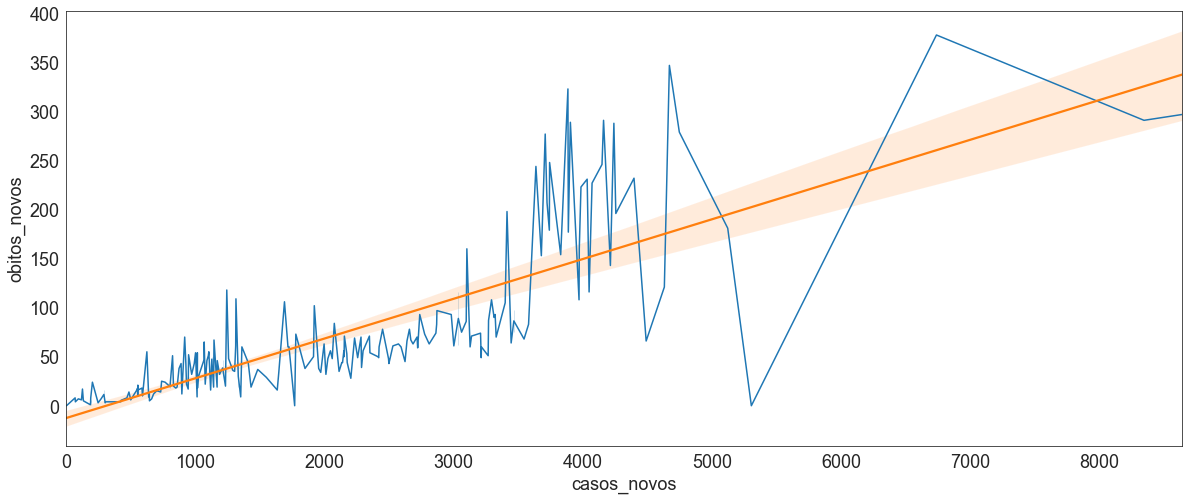

In [671]:
sns.lineplot(x='casos_novos',y='obitos_novos',data=dados_parte_20_21)
sns.regplot(x='casos_novos', y='obitos_novos', data=dados_parte_20_21, scatter=False)
# o regplot adiciona uma linha de tendencia como uma regressão

##### Com a função shift() aplicada a obitos_novos em diversos períodos e testando com a função corr() do pandas obtivemos:
- Com toda a base 'dados_sp' a melhor correlação de 'casos_novos' foi mesmo com 'obitos_novos' com 73,5% e em segundo lugar oom 68,1% foi com 'obitos_-7_dias' ou seja com os óbitos sendo transportado -7 para trás (com shift)
- Já com a base parcial de 11/2020 a 4/2021 'dados_parte_20_21' a melhor correlação de 'casos_novos' foi também com 'obitos_novos' com o maior valor em 80,3% e em segundo lugar oom 76,5% foi ainda com 'obitos_-7_dias' ou seja com os números sendo transportado -7 para trás (com shift)
- No lineplot acima com 'dados_parte_20_21' uma aparencia de linha em alguns períodos já é mais evidente. O Regplot adicionou uma pretensa linha da tendência da relação.
- Com essa avaliação, observa-se que mesmo a amaior correlação sendo de casos_novos com obitos_novos também verifica-se alta correlação quando os óbitos_novos são transportados 7 dias para trás, em outras palavras é como se os casos novos de covid possam gerar até 7 dias depois uma relação com novos óbitos. Testes estatísticos mais completos podem ser feitos para investigar esse fenômeno apregoado por epidemiologistas sobre os óbitos aumentarem cerca de 2 semanas após o aumento dos casos novos ou mesmo se isso pode ser estatisticamente verificado.

#### Desafio 06 - Aula 1: Função de correlação cruzada dos óbitos e casos.

Solução para usar a de correlação cruzada XCORR plotada em um gráfico foi visto no desafio do [**RPGraciotti**](https://github.com/RPGraciotti/BootCampAlura/blob/main/Modulo_3/Aula_1_Entendendo_a_serie_temporal.ipynb) indicando os links:
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xcorr.html#matplotlib.pyplot.xcorr
- https://www.geeksforgeeks.org/matplotlib-pyplot-xcorr-in-python/

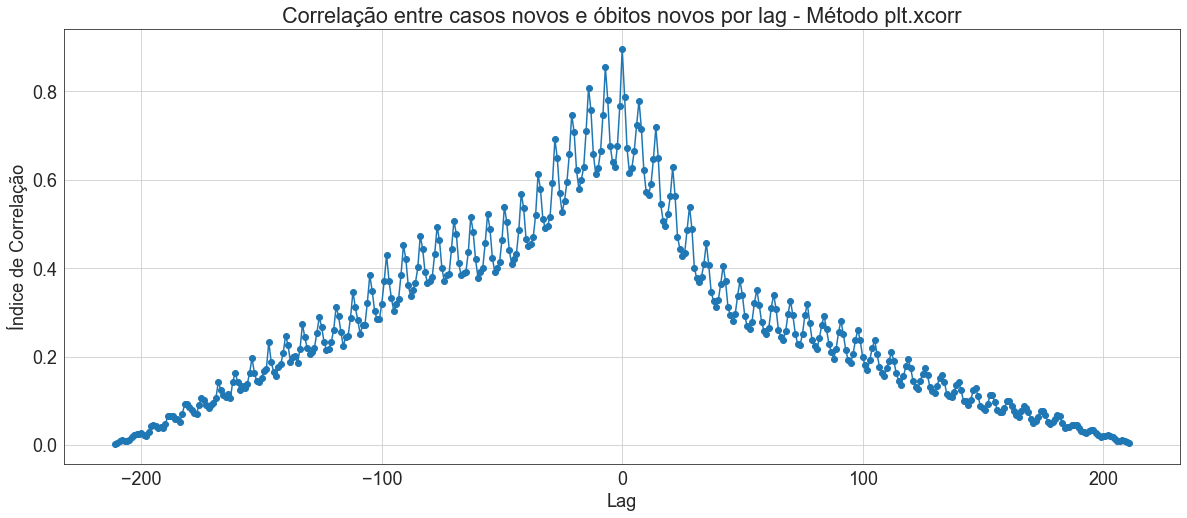

In [672]:
plt.title("Correlação entre casos novos e óbitos novos por lag - Método plt.xcorr - para o período de 10/2020 a 04/2021")
plt.xcorr(x = dados_parte_20_21.loc[:,"casos_novos"].astype(float), y = dados_parte_20_21.loc[:,"obitos_novos"].astype(float),
          maxlags = None, usevlines = False, linestyle = "-")
plt.grid()
plt.ylabel("Índice de Correlação")
plt.xlabel("Lag")
plt.show()

A forma de realizar essa correlação no pyplot.xcorr se assemelha a função pd.corr() vista na tabela anterior aprensentando porém os destaques:
- o pyplot.xcorr() calcula a correlação considerando lagas negativos e positivos, como se fossem o intervalo com o shift. Dessa forma é muito prático pois plota tudo de vez sem o trabalhão de mudar o DF como visto acima.
- Nesse período curto há alta correlação entre as variáveis de caso e óbitos novos nos primeiros 100 dias.
- A correlação cai com o passar do tempo tendendo a zero após 200 dias pra frente ou para trás

#### Desafio 07 - Aula 1: Estudar outros municípios a sua escolha. 
***
***

Fica como missão obter uma base covid de Salvador e Vitória da Conquista - BA